You can find a textual explanation of all the data I've extracted during the Exploratory Data Analysis (EDA) at the following URL: actum.it/notebook.

In [ ]:
#pip install seaborn

In [3]:
import pandas as pd

# Specify the file path from Task1-P0
csv_file_path = 'data/t1p0-dataset_scraped_airlinequality_BA.csv'

def process_csv(csv_path):
    print(f"\nExtraction {csv_path}")
    df_aq = pd.read_csv(csv_path, delimiter='%%%', engine='python')
    # Drop the "Unnamed: 0" column if it exists, and ignore errors if it doesn't
    df_aq.drop(columns=["Unnamed: 24"], inplace=True, errors='ignore')
    # Return the modified DataFrame
    return df_aq

df_aq = process_csv(csv_file_path)

# Test processed df
df_aq.head()



Extraction data/dataset_scraped_airlinequality_BA.csv


,id,rating,author,authorNationality,isTripVerified,title,datePublished,body,travellerType,aircraft,...,dateFlownMonth,dateFlownYear,ratingSeatComfort,ratingCabinStaffService,ratingFoodAndBeverages,ratingInflightEntertainment,ratingGroundService,ratingWifiAndConnectivity,ratingValueForMoney,airlineRecommendation
0,877522,1,Terry Anderson,United States,False,the worst experience ever,2023-10-22,Absolutely the worst experience ever. Flew in...,Couple Leisure,NaN,...,October,2023.0,2,3,3,3,1,3,1,no
1,877484,8,Philip Thompson,United Kingdom,False,an exceptional crew member,2023-10-22,\xc2\xa0 \xc2\xa0Flew back from Malta after sc...,Couple Leisure,A320,...,October,2023.0,4,5,3,u,4,u,4,yes
2,877425,3,M Meijs,Netherlands,False,even Ryanair have more space,2023-10-21,"Cabin luggage had to go to cargo, even when I ...",Solo Leisure,NaN,...,October,2023.0,1,3,u,u,2,u,1,no
3,877380,4,Mehmet Sahiner,United Kingdom,True,in-flight service is usually weak,2023-10-21,I have been using BA for a while now and on av...,Solo Leisure,A380-800,...,October,2023.0,3,2,2,3,2,u,3,no
4,877175,1,T Meares,United Kingdom,True,BA customer service is a disgrace,2023-10-19,I flew from Istanbul to London in Business cla...,Solo Leisure,NaN,...,October,2023.0,2,1,1,1,2,1,1,no


In [4]:
# Extract df infos
df_aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3686 non-null   int64  
 1   rating                       3686 non-null   object 
 2   author                       3686 non-null   object 
 3   authorNationality            3684 non-null   object 
 4   isTripVerified               3686 non-null   bool   
 5   title                        3686 non-null   object 
 6   datePublished                3686 non-null   object 
 7   body                         2163 non-null   object 
 8   travellerType                2915 non-null   object 
 9   aircraft                     1913 non-null   object 
 10  cabin                        3684 non-null   object 
 11  routeFrom                    2898 non-null   object 
 12  routeVia                     2911 non-null   object 
 13  routeTo           

In [5]:
# quick look on describe
df_aq.describe()

,id,dateFlownYear
count,3686.000000,2908.000000
mean,488211.175800,2017.878955
std,193316.738246,2.475153
min,243654.000000,2014.000000
25%,335527.000000,2016.000000
50%,461414.000000,2017.000000
75%,645327.750000,2019.000000
max,877522.000000,2023.000000


# ANALYZING Airline Data Quality

In [6]:
#Seaborn visualization
import random
import seaborn as sns

In [7]:
# Change to display items:
display_plot = True
display_print = True

# PLOTS
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

# PLOTS and EDA over specified dataset and column
def stats_unique_values(data, column_name):
  column_rows = len(data[column_name])
  unique_values_count = len(data[column_name].unique())
  # Unique values
  if display_print == True:
      print(f"Column: {column_name} has {unique_values_count} unique values in {column_rows} rows\n")

  #Note, adjist data theshold, now is 500

  # FOR LOW VOLUME DATA
  if unique_values_count < 500:
      # extract data
      value_counts = data[column_name].value_counts().sort_values(ascending=False)
      max_value_length = max(len(str(value)) for value in value_counts.index)
      total_count = value_counts.sum()
      for value, count in value_counts.items():
          percentage = (count / total_count) * 100
          if display_print == True:
              print(f'{value:{max_value_length}}  {count} ({percentage:.2f}%)')
      if display_print == True:
          print("")
      # Display plot
      if display_plot == True:
          if pd.api.types.is_numeric_dtype(data[column_name]):
              plot_continuous_distribution(data , column_name)
          else:
              plot_categorical_distribution(data , column_name)
  # FOR HIGH VOLUME DATA
  else:
      random_numbers = [random.randint(0, unique_values_count-1) for _ in range(5)]
      if display_print == True:
          print("Samples:")
      for num in random_numbers:
          if display_print == True:
              print(data[column_name][num])
      if pd.api.types.is_numeric_dtype(data[column_name]):
          column_stats = data[column_name].describe()
          # Extract and print specific statistics
          mean = column_stats['mean']
          std = column_stats['std']
          min_value = column_stats['min']
          quartile_25 = column_stats['25%']
          median = column_stats['50%']
          quartile_75 = column_stats['75%']
          max_value = column_stats['max']
          if display_print == True:
              print(f"\nDescription:")
              print(f"mean:{mean}")
              print(f"std: {std}")
              print(f"min: {min_value}")
              print(f"25%: {quartile_25}")
              print(f"50%: {median}")
              print(f"75%: {quartile_75}")
              print(f"max: {max_value}")
      else:
          if display_print == True:
              print("\nThe column is not numeric.")
  if display_print == True:
      print(f"\nName: {column_name}, dtype: {data[column_name].dtype}")

  print(f"\n\n\n ---------------------------------------------")


# UNIQUES
def return_unique_values(df_aq, column_name):
    return df_aq[column_name].unique()

# GET COLUMN NAMES
def return_column_names(df_aq):
    return df_aq.columns

In [9]:
# PERFORM primary EDA, remove last hash.

# Get Column names
colun_names = return_column_names(df_aq)

for name in colun_names:
    print(name)
    #stats_unique_values(df_aq, name)
    

id
rating
author
authorNationality
isTripVerified
title
datePublished
body
travellerType
aircraft
cabin
routeFrom
routeVia
routeTo
dateFlownMonth
dateFlownYear
ratingSeatComfort
ratingCabinStaffService
ratingFoodAndBeverages
ratingInflightEntertainment
ratingGroundService
ratingWifiAndConnectivity
ratingValueForMoney
airlineRecommendation


# Convesion: Obj > Timestamp

In [48]:
from datetime import datetime

In [49]:
def convert_to_timestamp(data: pd.DataFrame, column: str):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d')
    return dummy

In [50]:
# convert Timestamp
df_aq = convert_to_timestamp(df_aq, 'datePublished')

# tests:
df_aq.head()
df_aq.info()
df_aq.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3686 non-null   int64         
 1   rating                       3686 non-null   object        
 2   author                       3686 non-null   object        
 3   authorNationality            3684 non-null   object        
 4   isTripVerified               3686 non-null   bool          
 5   title                        3686 non-null   object        
 6   datePublished                3686 non-null   datetime64[ns]
 7   body                         2163 non-null   object        
 8   travellerType                2915 non-null   object        
 9   aircraft                     1913 non-null   object        
 10  cabin                        3684 non-null   object        
 11  routeFrom                    2898 non-null 

,id,rating,author,authorNationality,isTripVerified,title,datePublished,body,travellerType,aircraft,...,dateFlownMonth,dateFlownYear,ratingSeatComfort,ratingCabinStaffService,ratingFoodAndBeverages,ratingInflightEntertainment,ratingGroundService,ratingWifiAndConnectivity,ratingValueForMoney,airlineRecommendation
0,877522,1,Terry Anderson,United States,False,the worst experience ever,2023-10-22,Absolutely the worst experience ever. Flew in...,Couple Leisure,NaN,...,October,2023.0,2,3,3,3,1,3,1,no
1,877484,8,Philip Thompson,United Kingdom,False,an exceptional crew member,2023-10-22,\xc2\xa0 \xc2\xa0Flew back from Malta after sc...,Couple Leisure,A320,...,October,2023.0,4,5,3,u,4,u,4,yes
2,877425,3,M Meijs,Netherlands,False,even Ryanair have more space,2023-10-21,"Cabin luggage had to go to cargo, even when I ...",Solo Leisure,NaN,...,October,2023.0,1,3,u,u,2,u,1,no
3,877380,4,Mehmet Sahiner,United Kingdom,True,in-flight service is usually weak,2023-10-21,I have been using BA for a while now and on av...,Solo Leisure,A380-800,...,October,2023.0,3,2,2,3,2,u,3,no
4,877175,1,T Meares,United Kingdom,True,BA customer service is a disgrace,2023-10-19,I flew from Istanbul to London in Business cla...,Solo Leisure,NaN,...,October,2023.0,2,1,1,1,2,1,1,no


# Remove duplicates IDs

In [51]:
df_aq.drop_duplicates(subset=['id'], inplace=True)
df_aq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3677 entries, 0 to 3685
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3677 non-null   int64         
 1   rating                       3677 non-null   object        
 2   author                       3677 non-null   object        
 3   authorNationality            3675 non-null   object        
 4   isTripVerified               3677 non-null   bool          
 5   title                        3677 non-null   object        
 6   datePublished                3677 non-null   datetime64[ns]
 7   body                         2163 non-null   object        
 8   travellerType                2915 non-null   object        
 9   aircraft                     1913 non-null   object        
 10  cabin                        3675 non-null   object        
 11  routeFrom                    2898 non-null   obj

Column: id has 3677 unique values in 3677 rows

Samples:
758865
320100
425960
655573
243857

Description:
mean:488807.8523252652
std: 193176.10387142797
min: 243654.0
25%: 336720.0
50%: 461749.0
75%: 646251.0
max: 877522.0

Name: id, dtype: int64



 ---------------------------------------------
Column: rating has 11 unique values in 3677 rows

1   860 (23.39%)
2   422 (11.48%)
3   403 (10.96%)
8   366 (9.95%)
10  327 (8.89%)
7   311 (8.46%)
9   309 (8.40%)
4   251 (6.83%)
5   234 (6.36%)
6   189 (5.14%)
u   5 (0.14%)


Name: rating, dtype: object



 ---------------------------------------------
Column: author has 2892 unique values in 3677 rows

Samples:
W Jackson
R Morrison
James Pang
Mark Williams
Paul Burgess

The column is not numeric.

Name: author, dtype: object



 ---------------------------------------------
Column: authorNationality has 72 unique values in 3677 rows

United Kingdom         2316 (63.02%)
United States          408 (11.10%)
Australia              155 (4.22%)


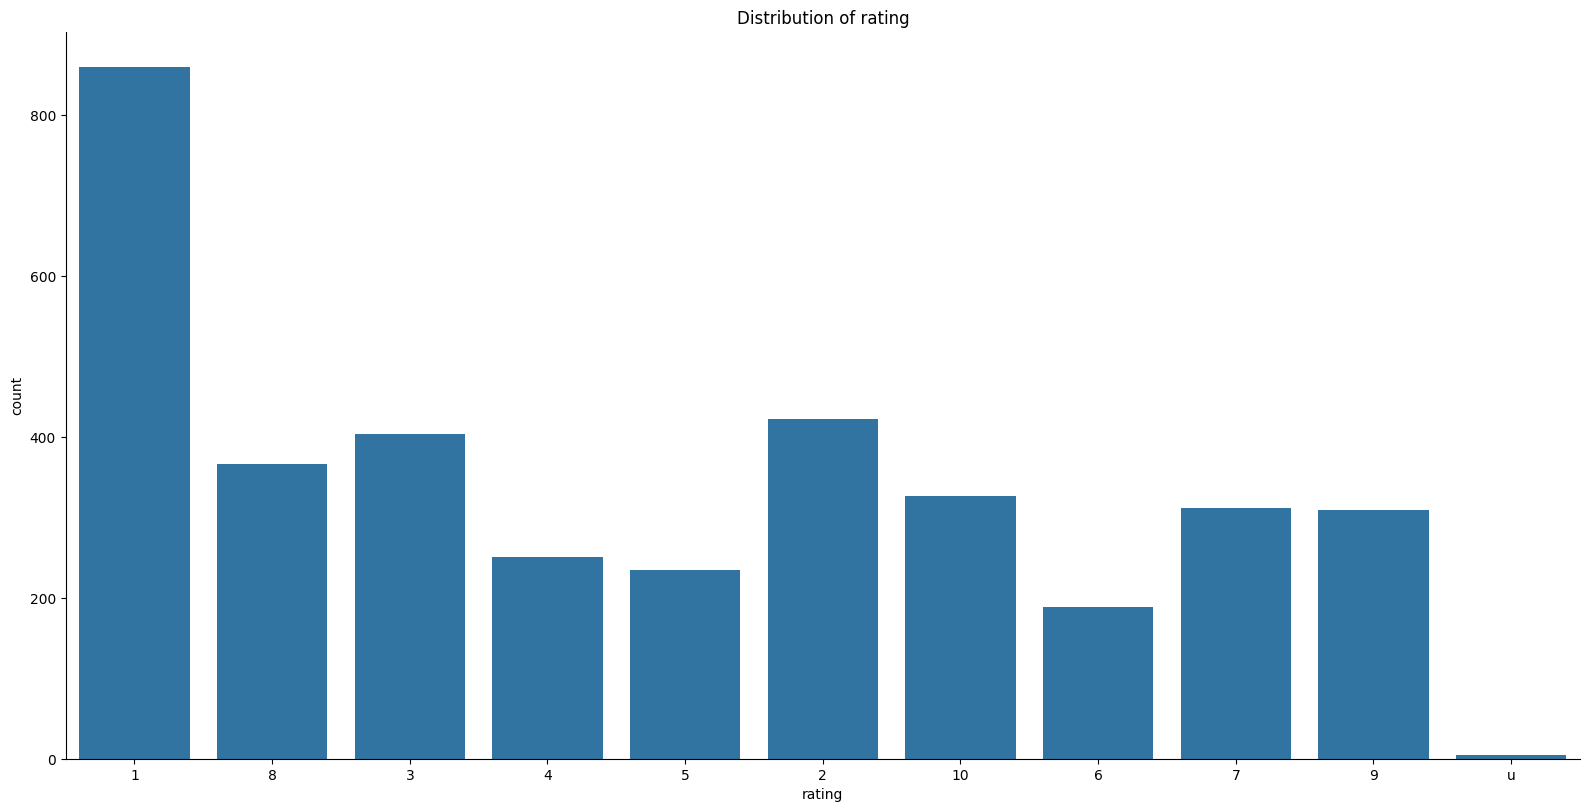

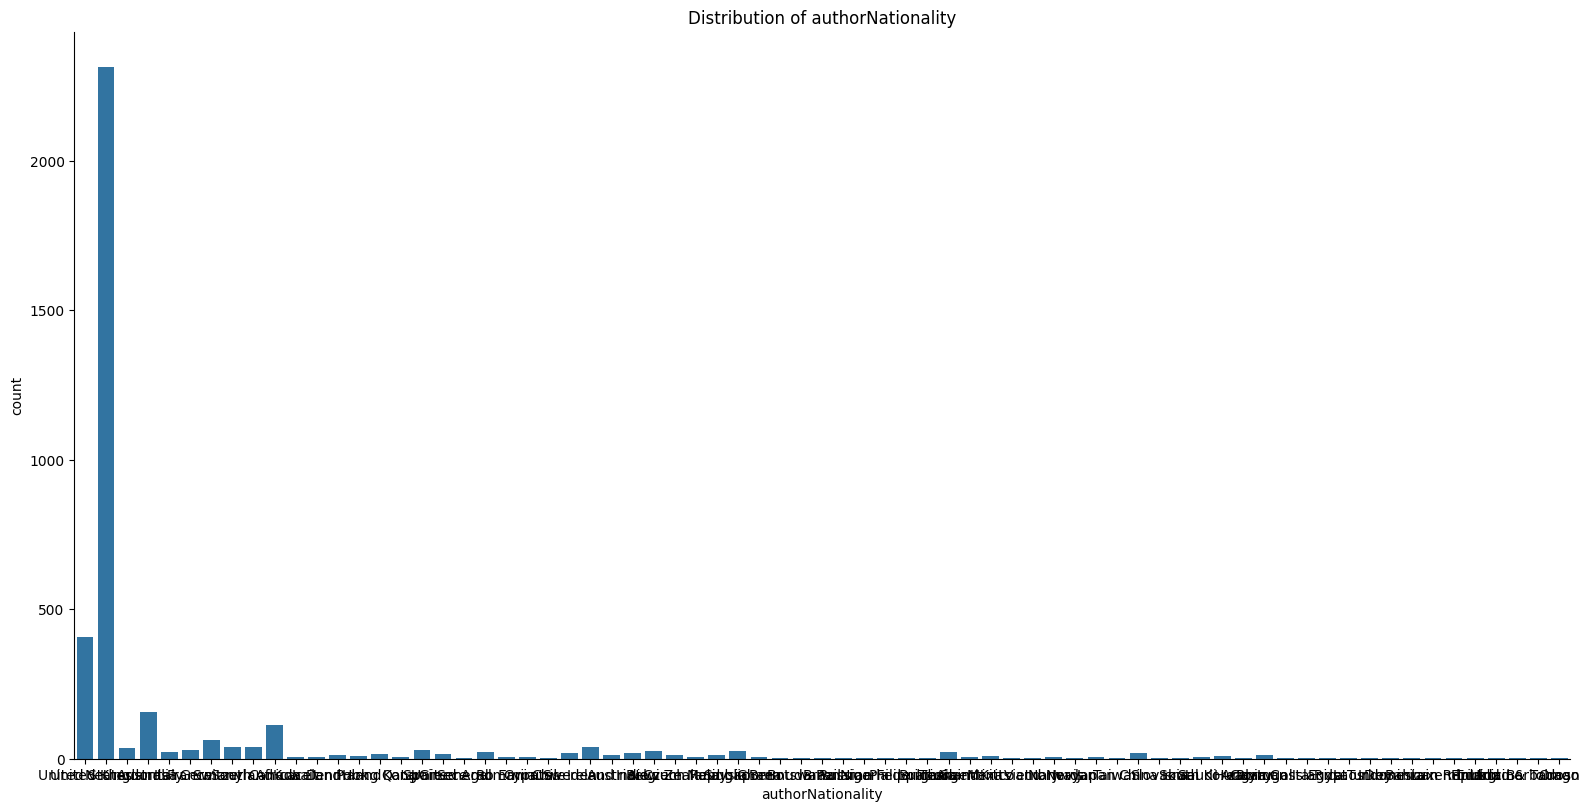

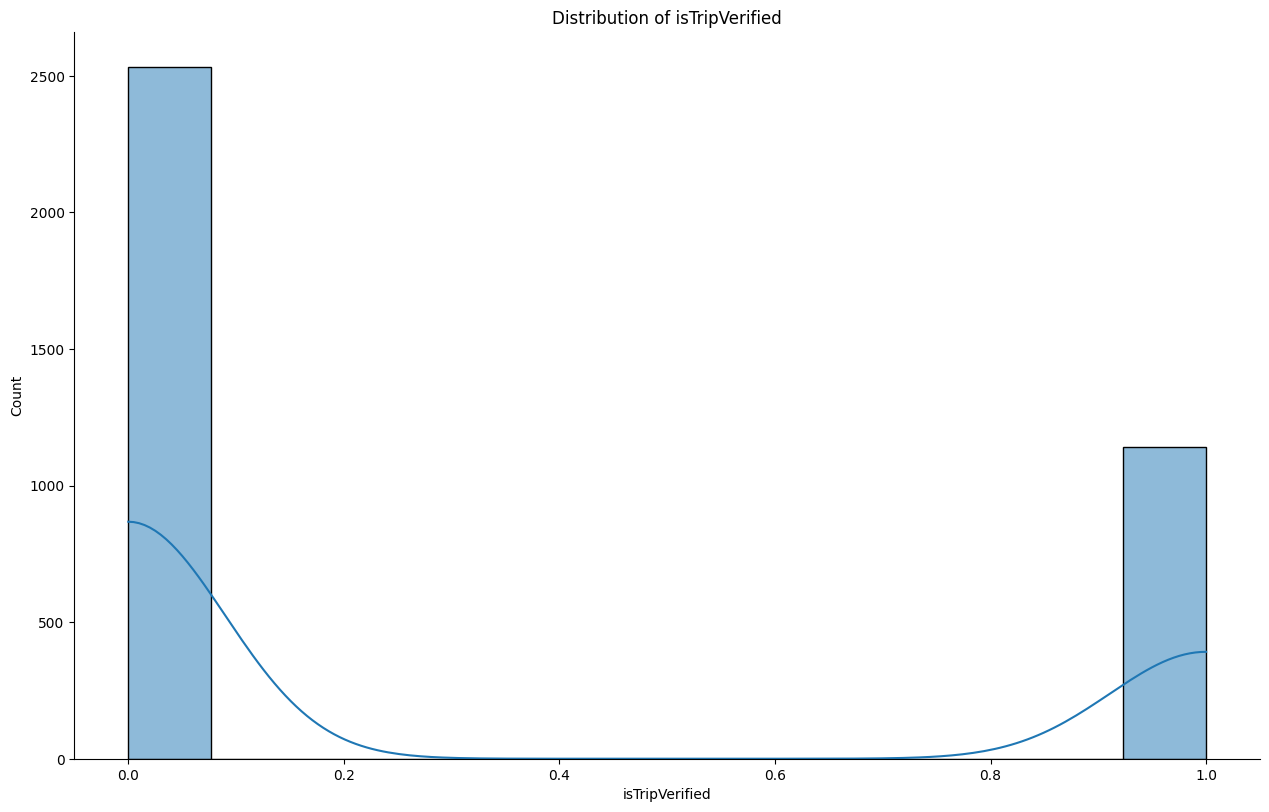

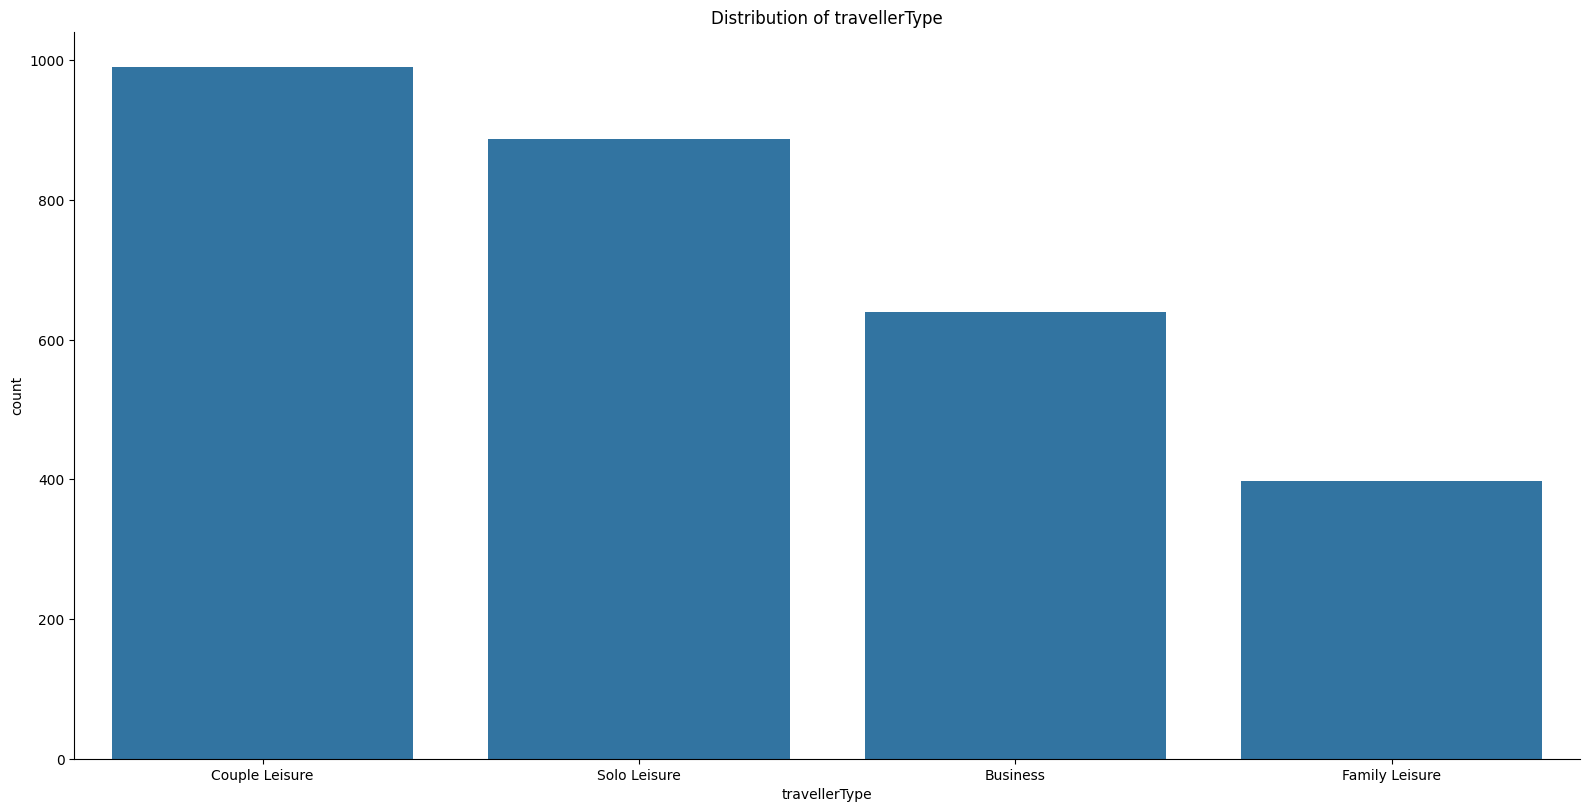

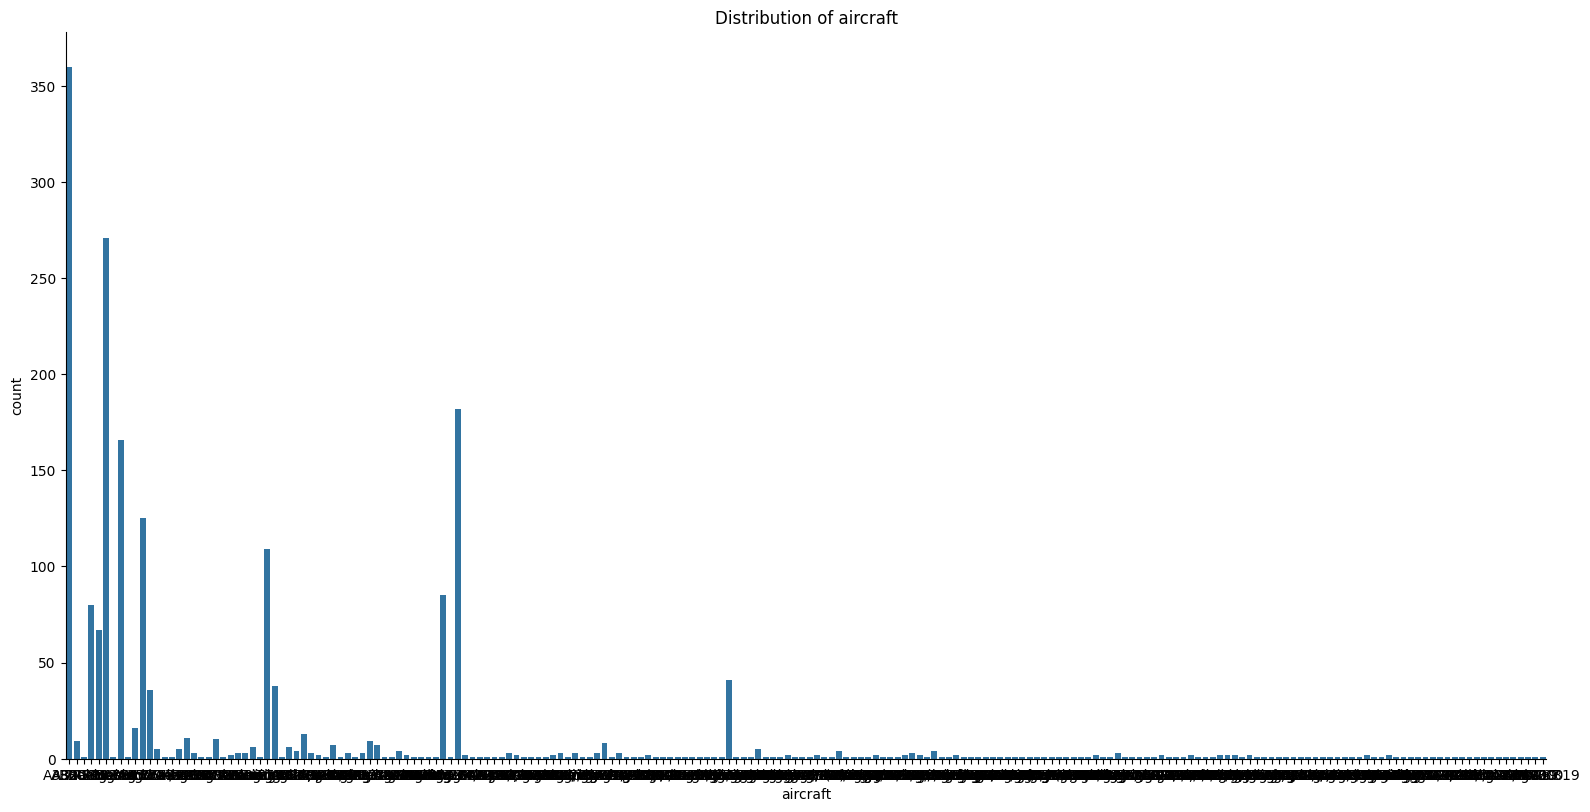

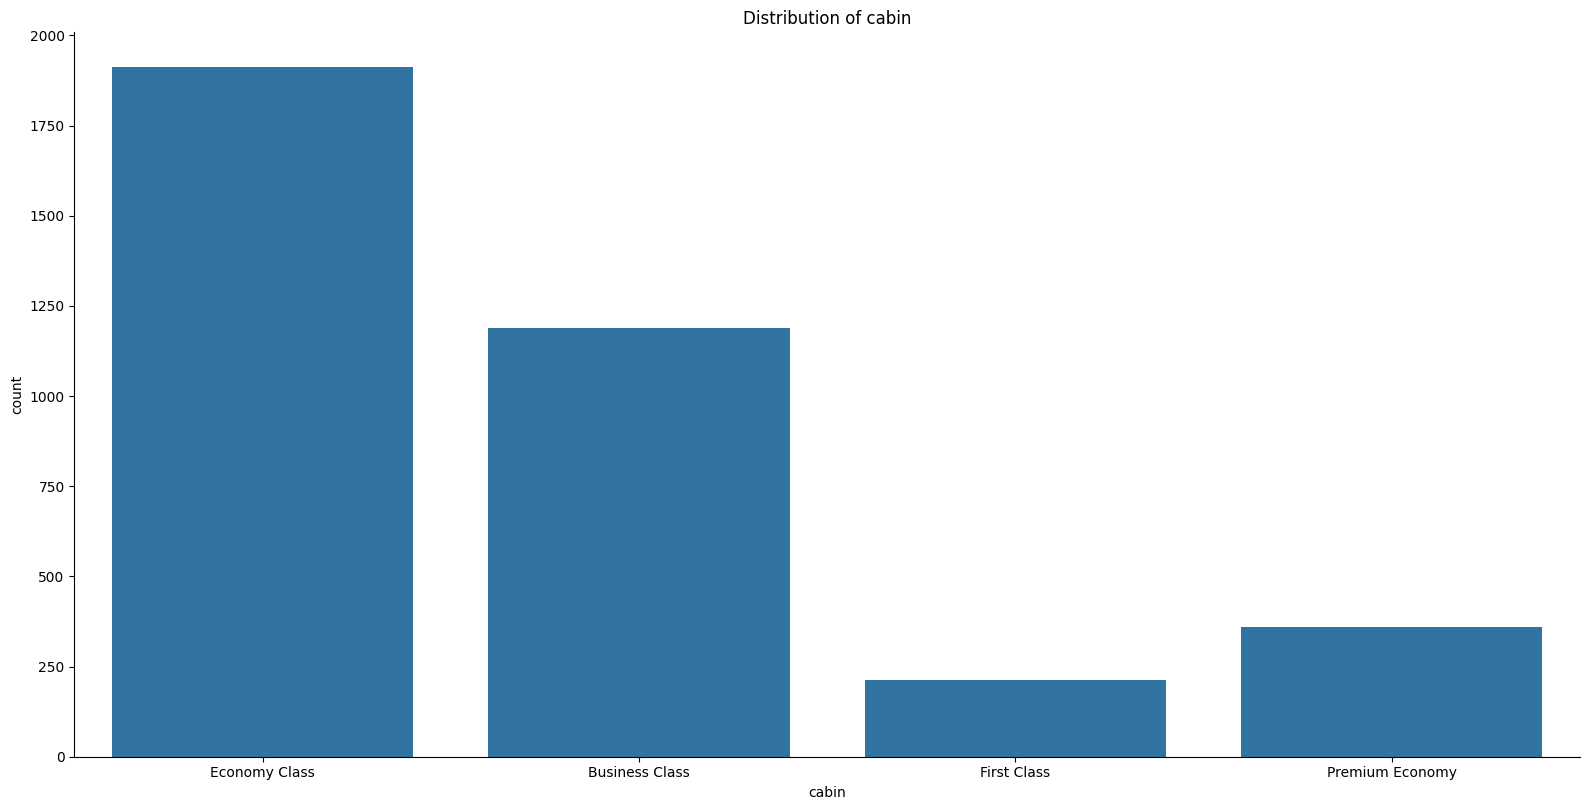

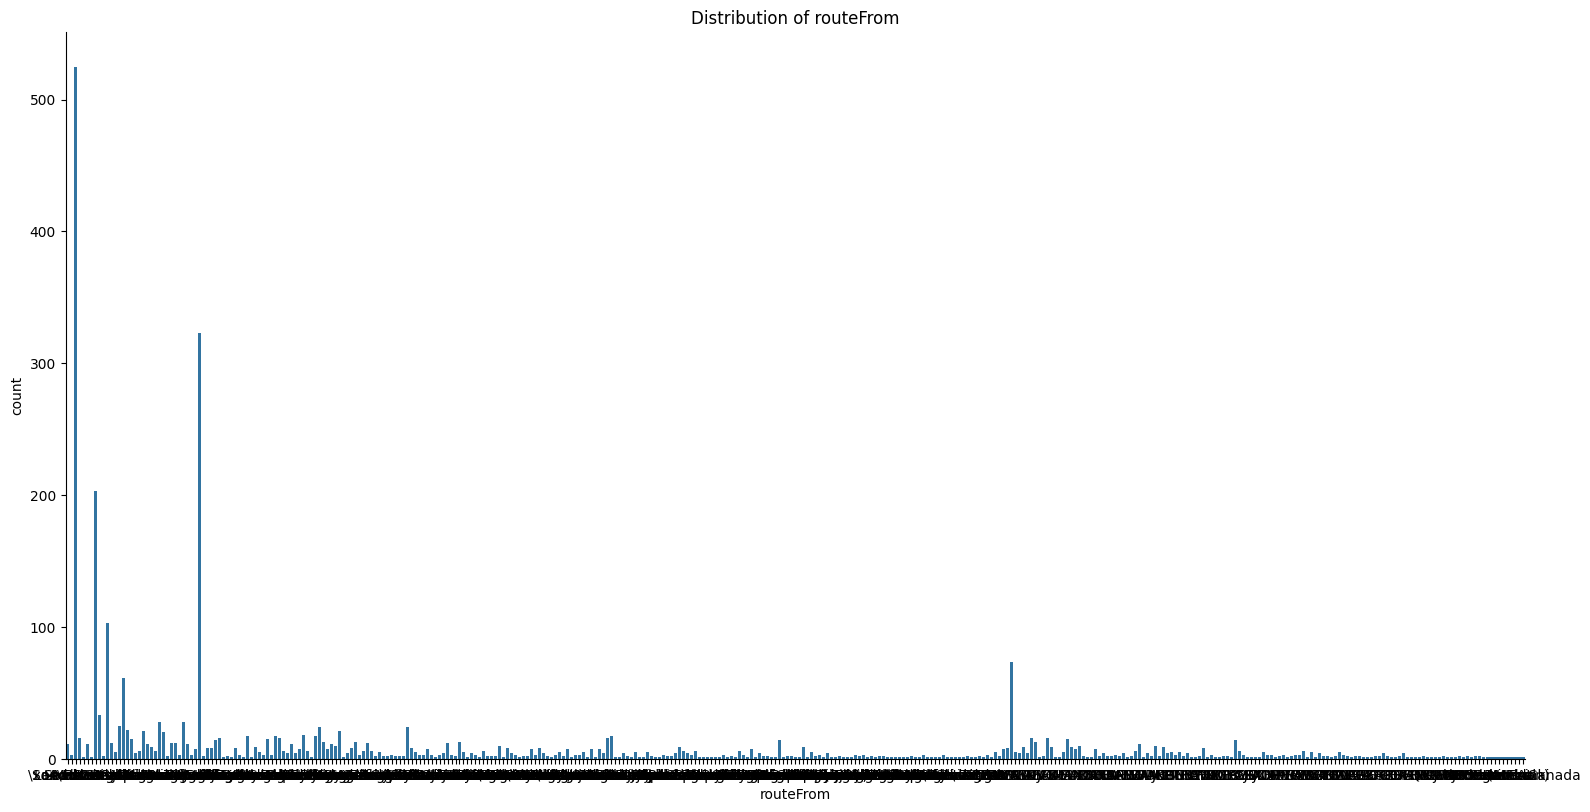

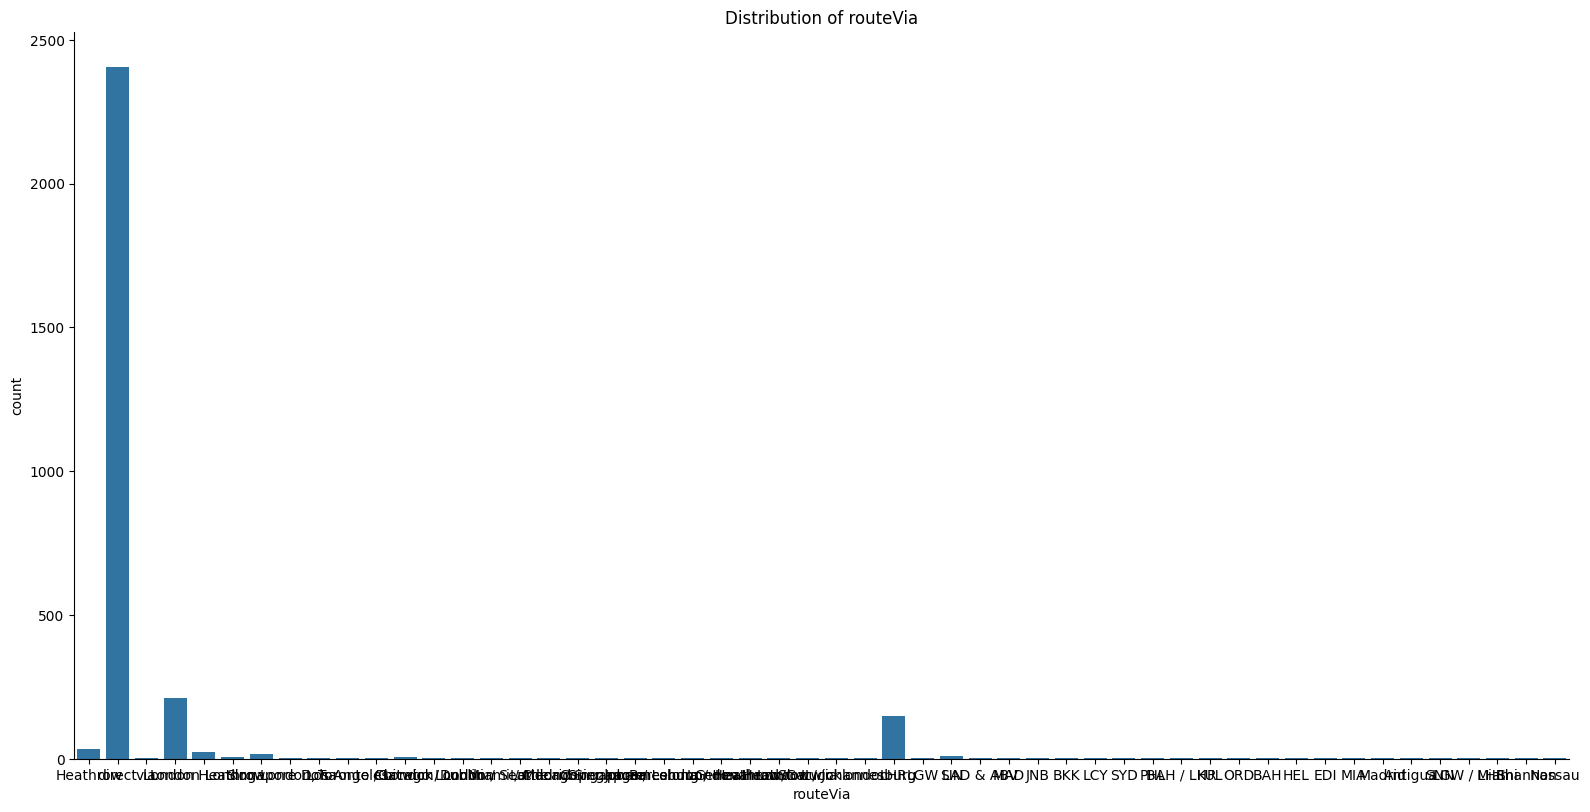

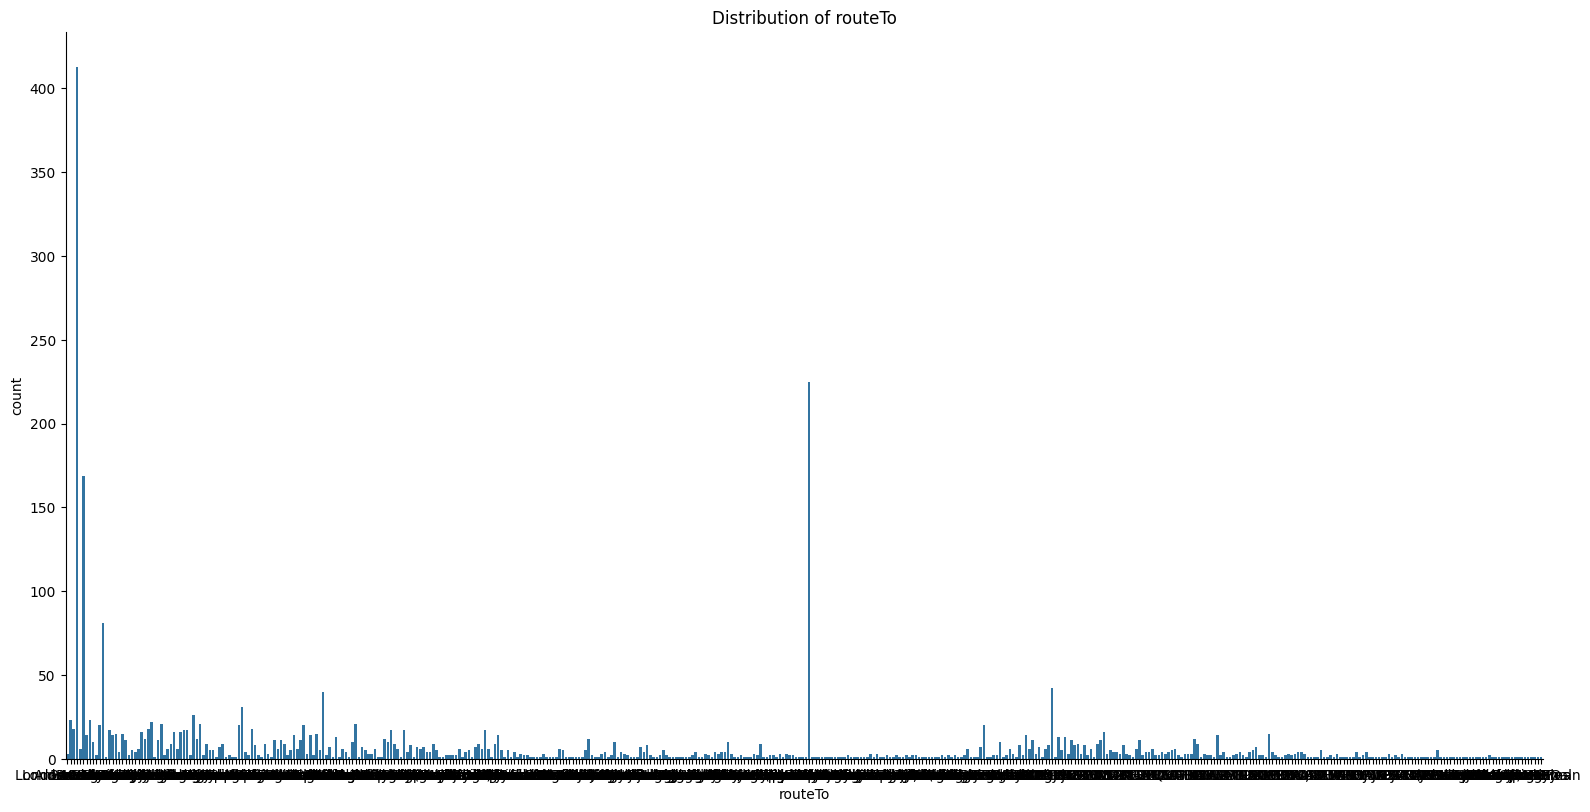

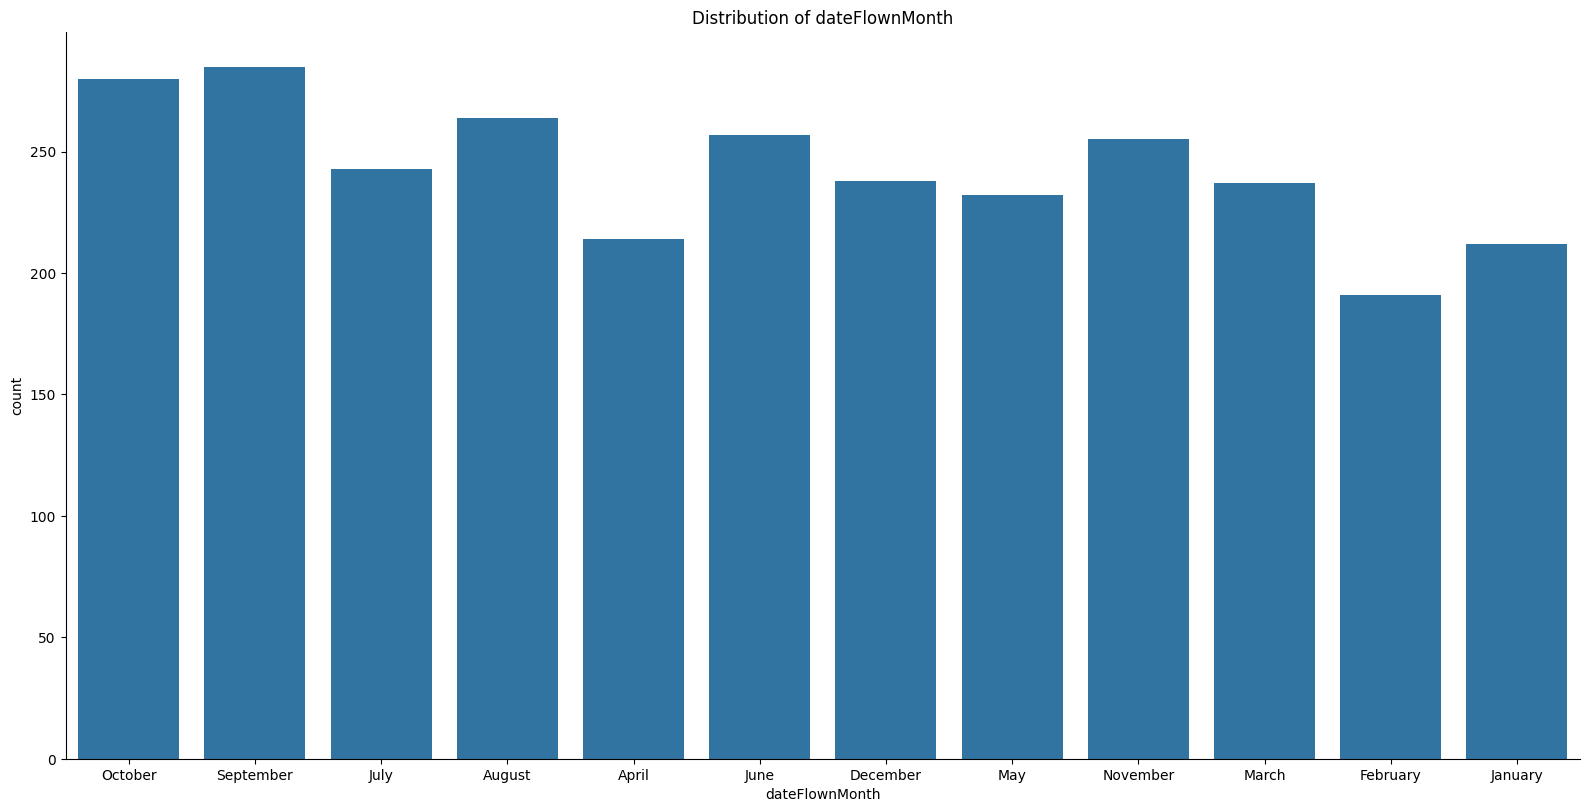

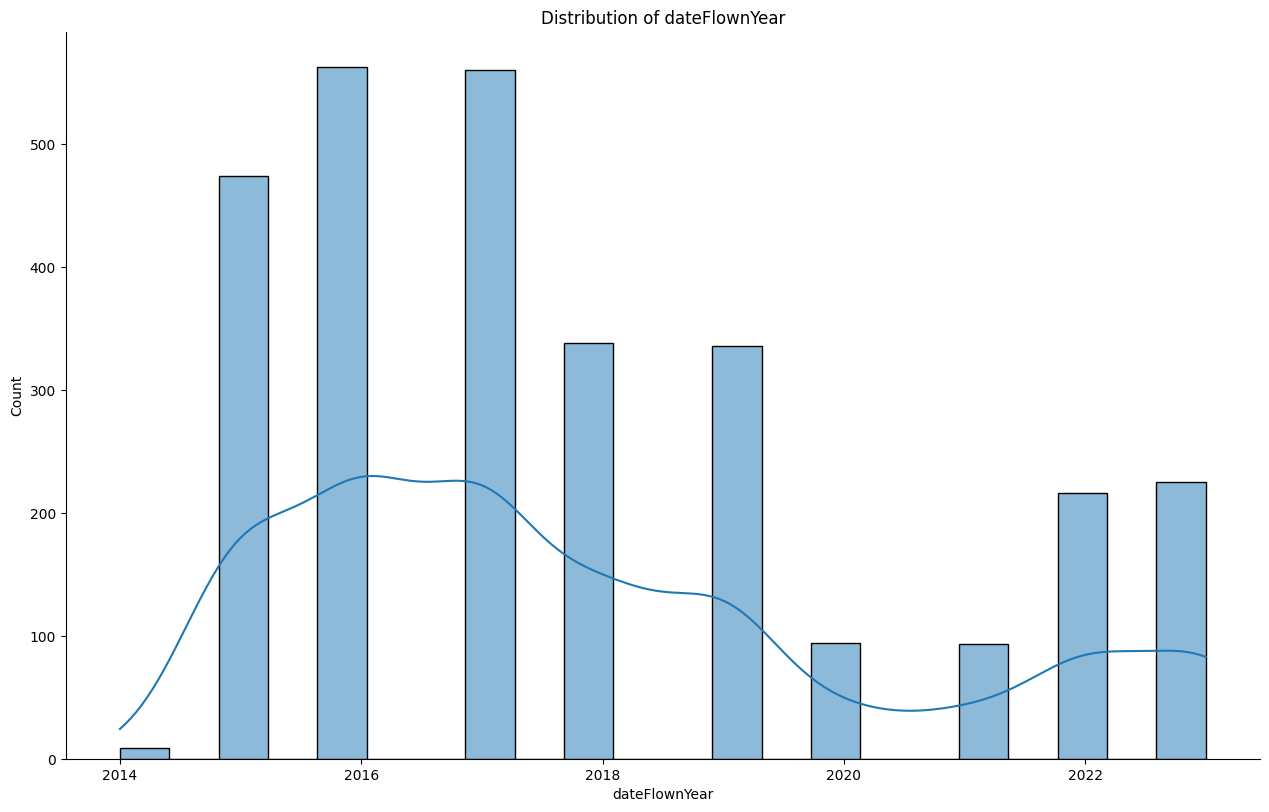

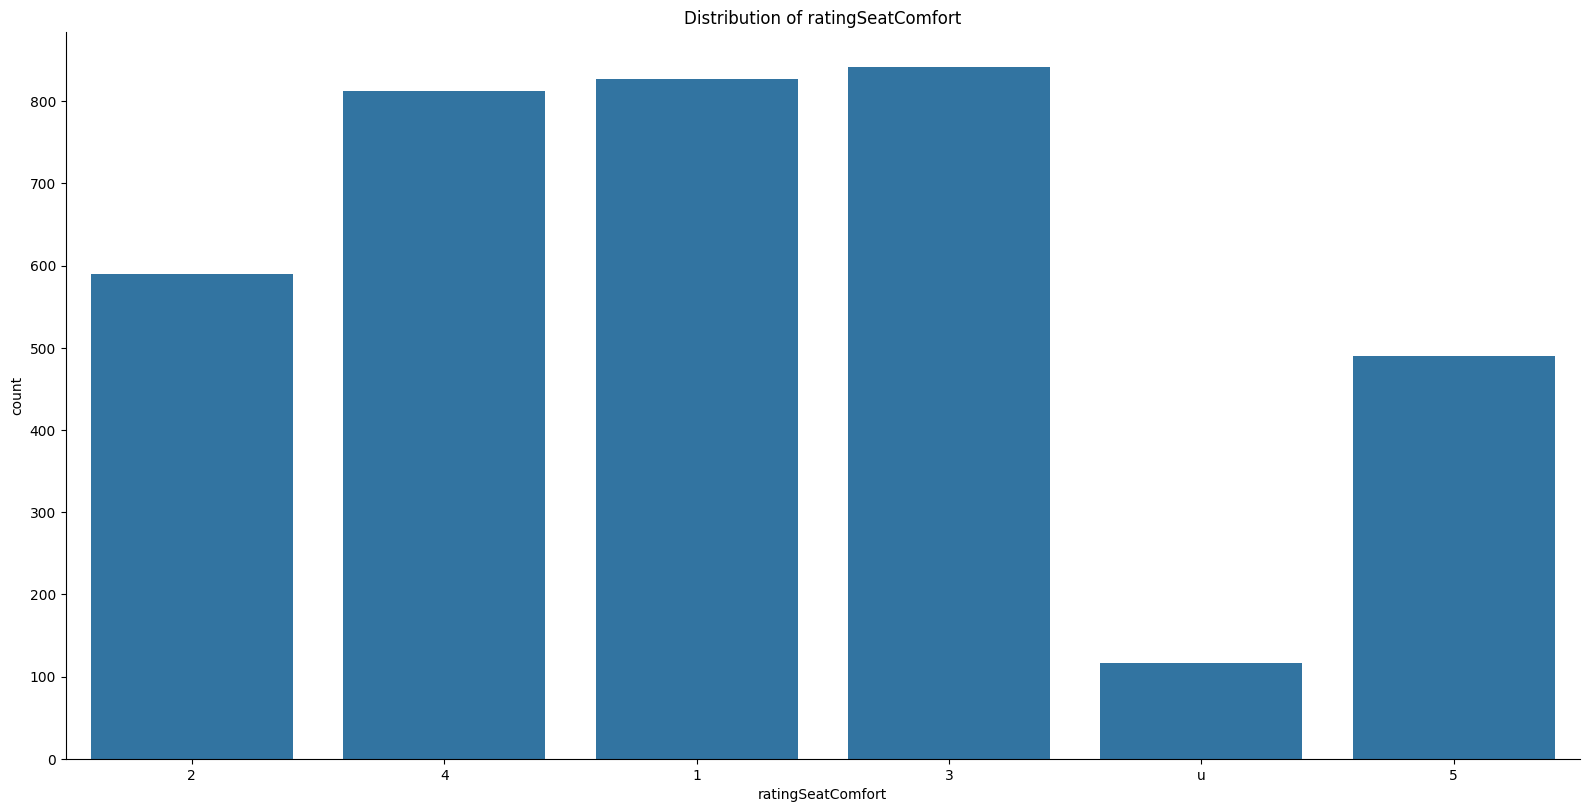

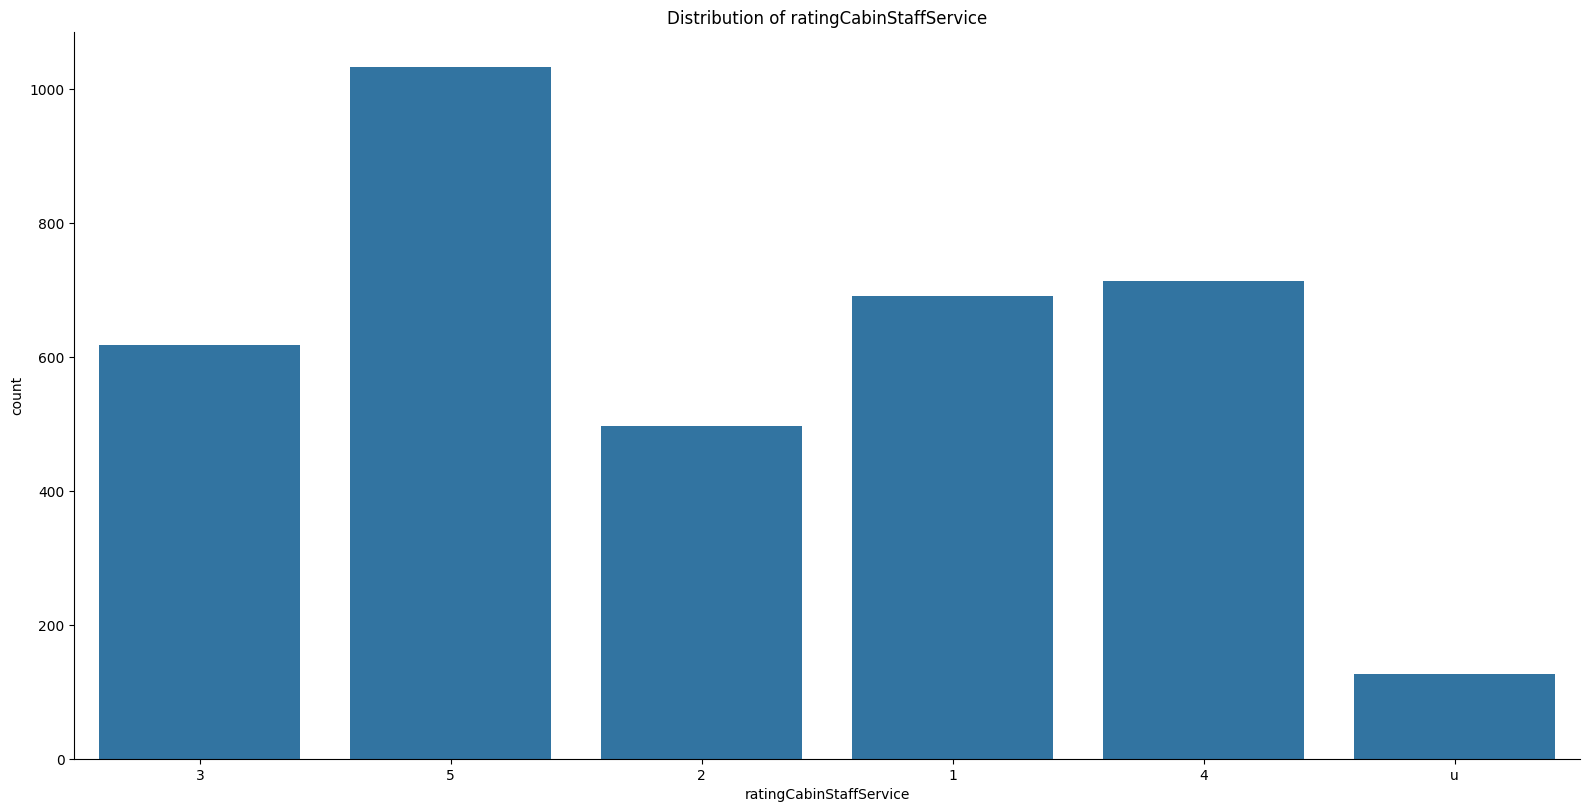

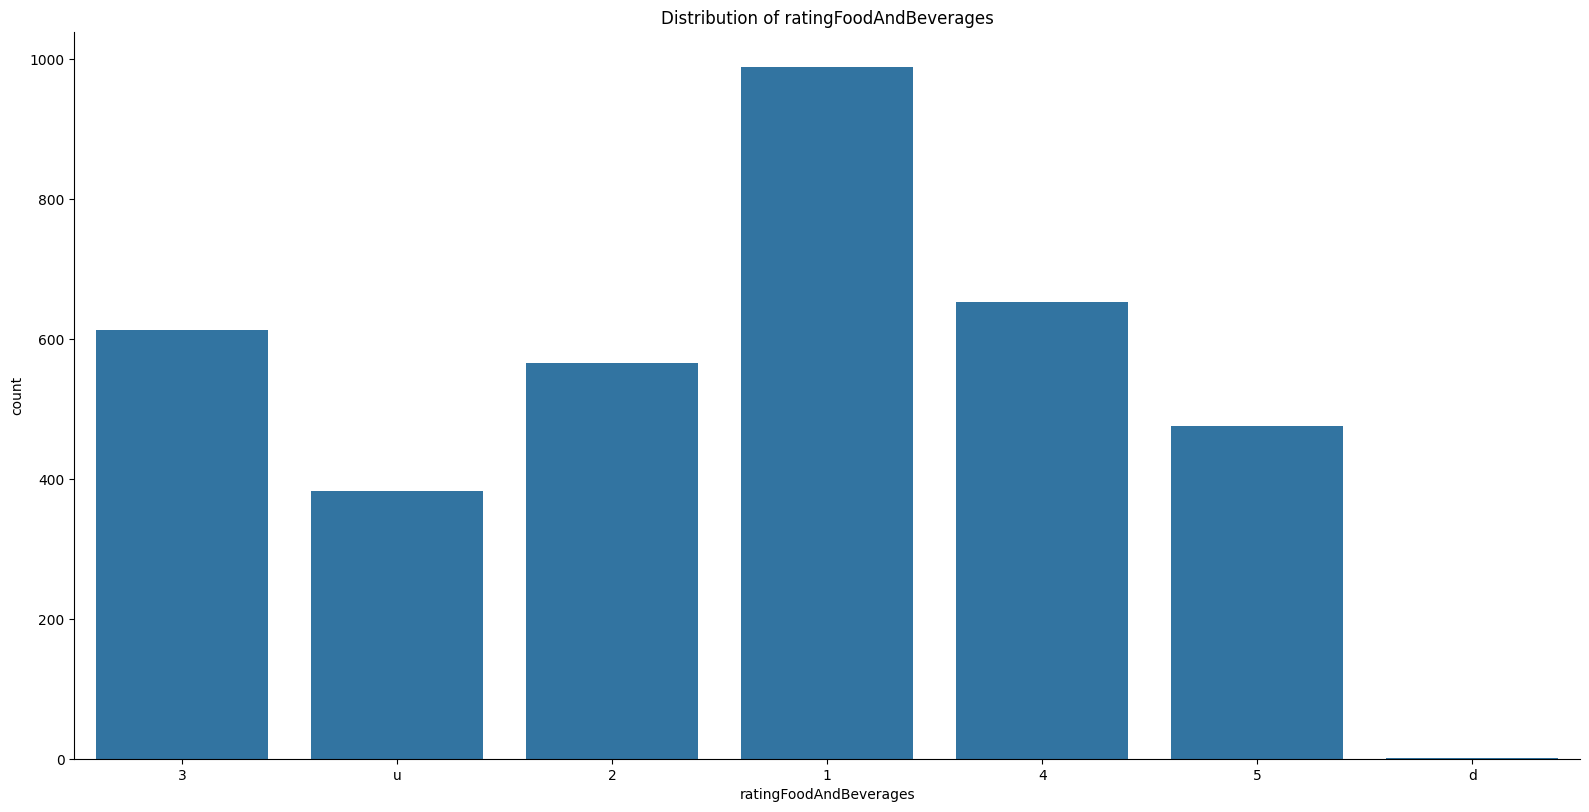

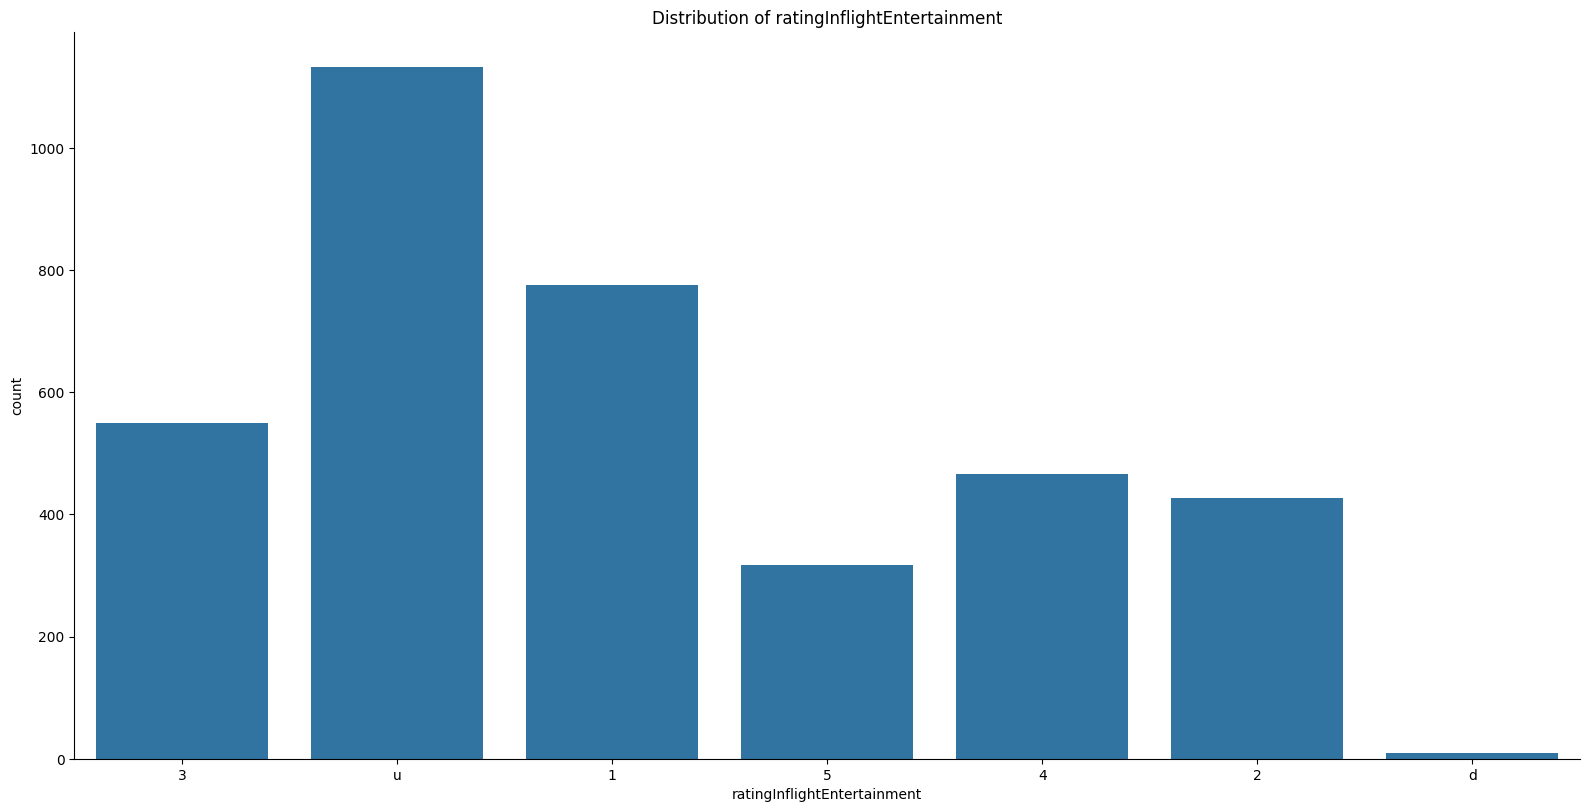

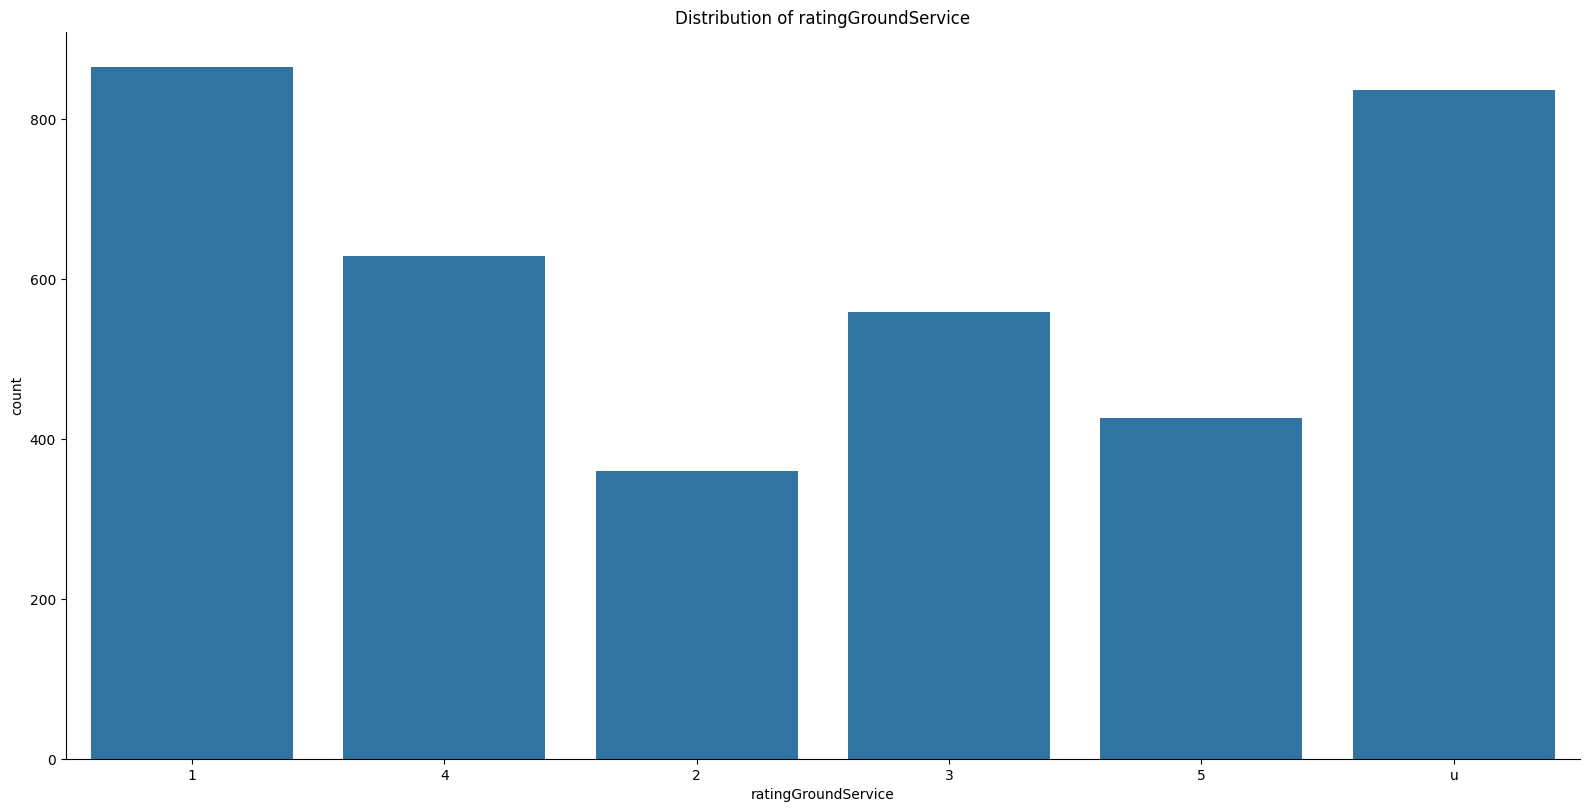

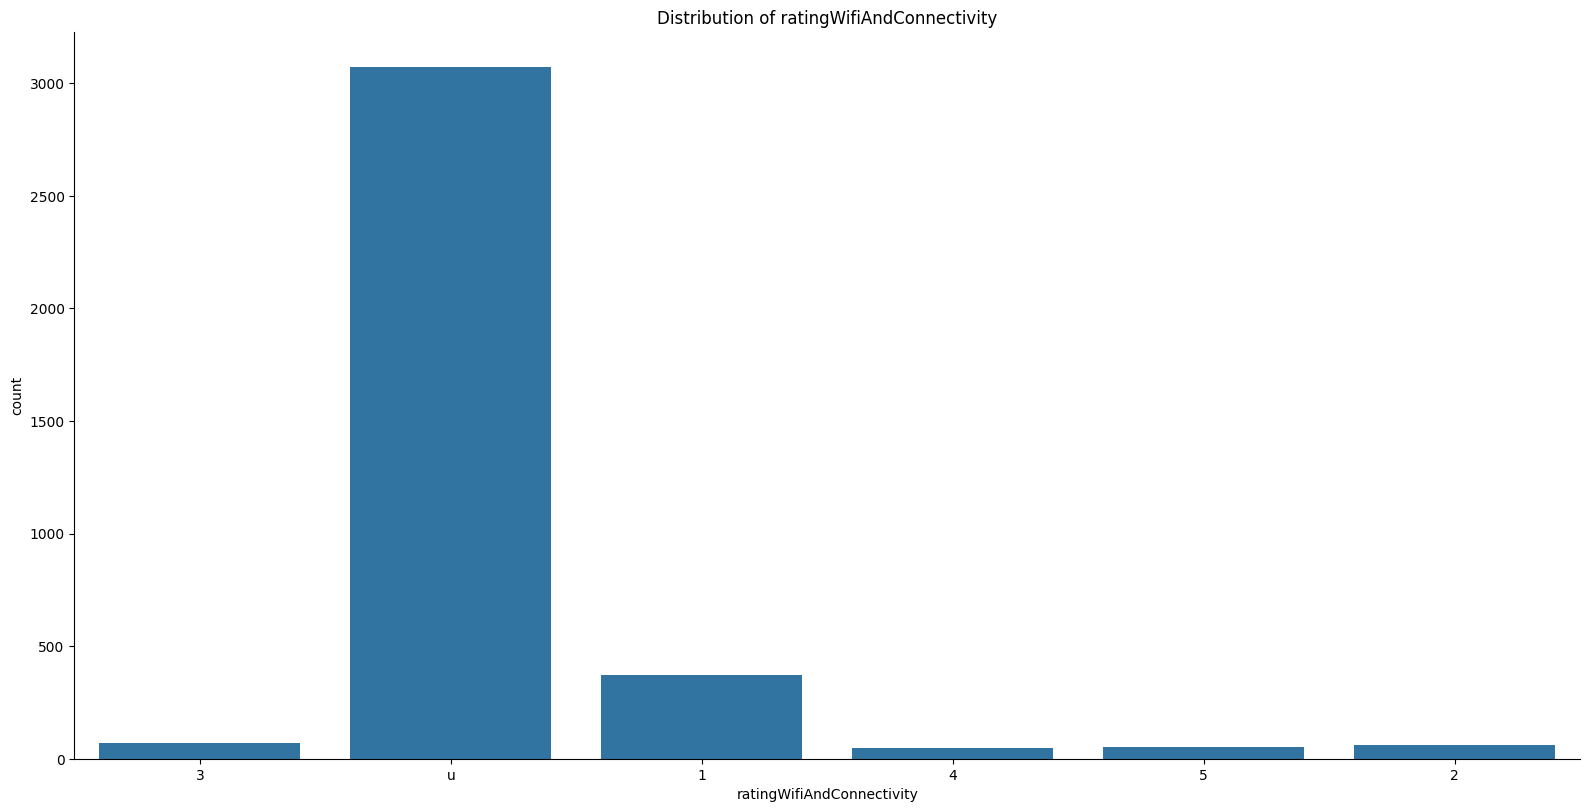

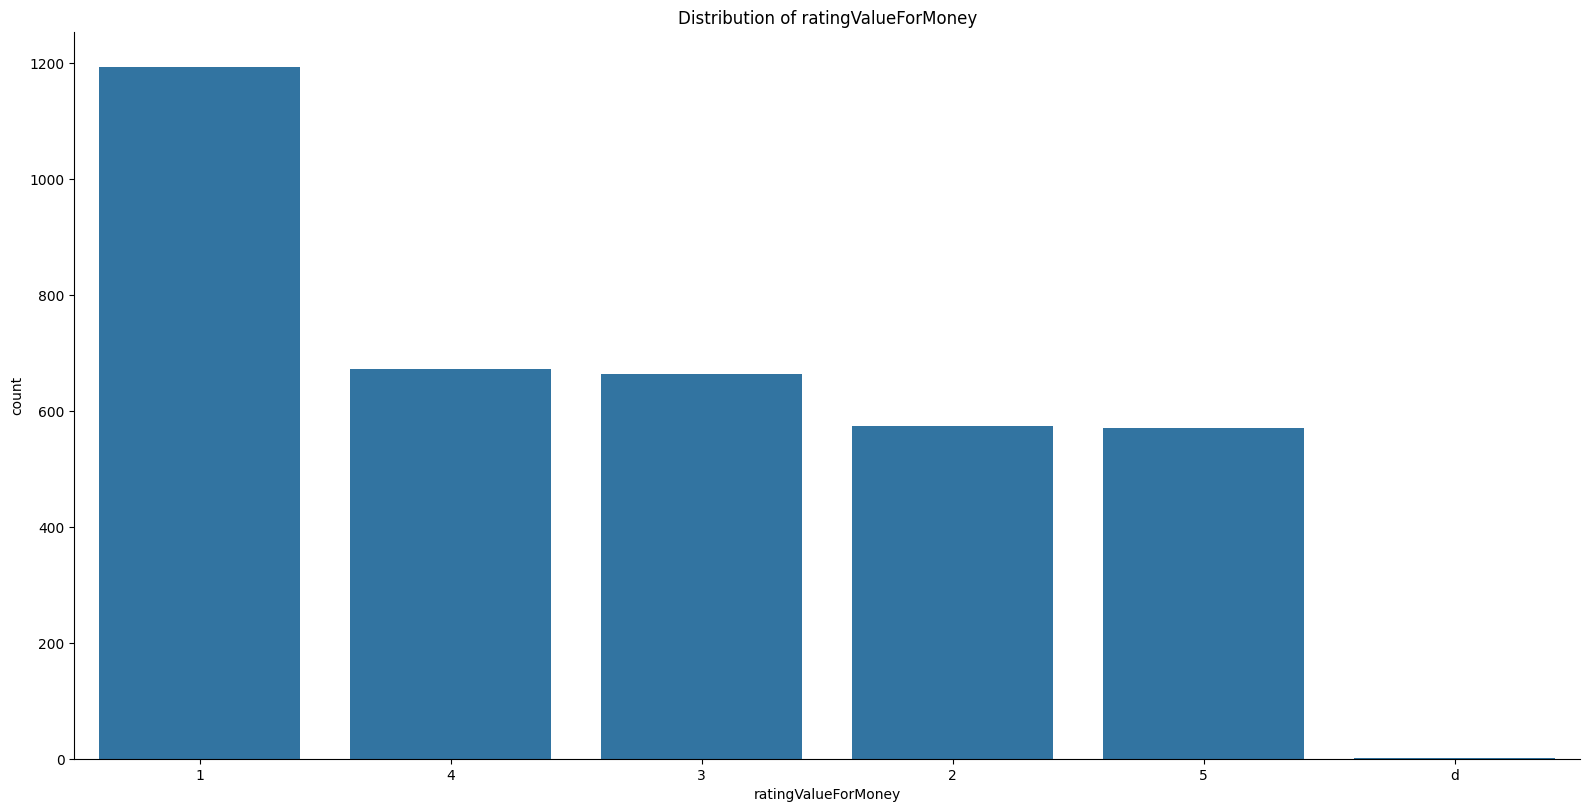

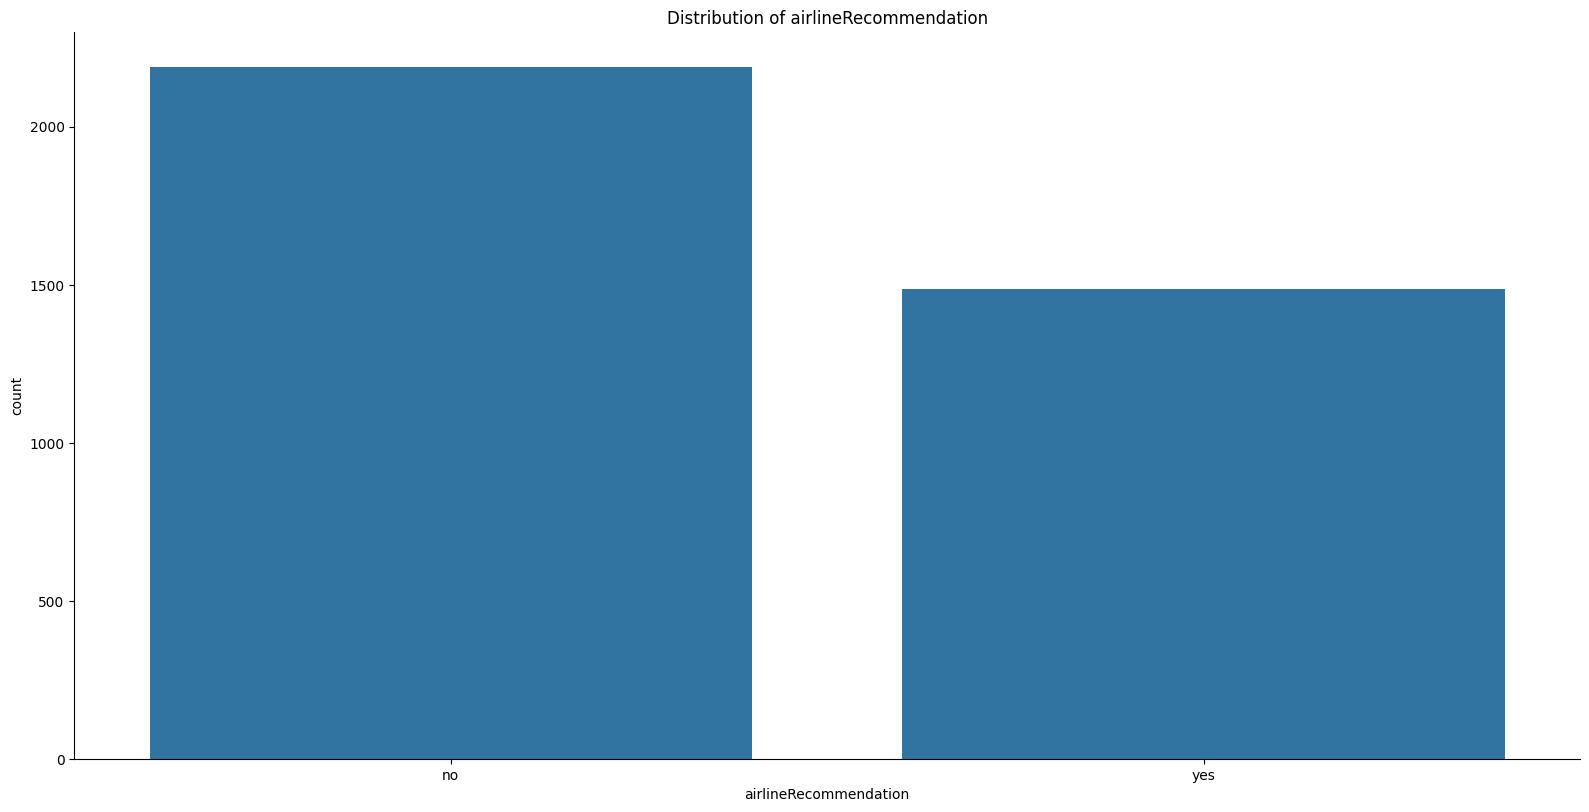

In [52]:
# PERFORMING main EDA
colun_names = return_column_names(df_aq)

for name in colun_names:
    stats_unique_values(df_aq, name)

# Extracting value from data

In [53]:
# Dataframe Rating
df_aq['rating'] = pd.to_numeric(df_aq['rating'], errors='coerce')

# Calculate the overall average of all values in the DataFrame
overall_average = df_aq['rating'].mean()

# Convert the 'datePublished' column to a Timestamp
df_aq['datePublished'] = pd.to_datetime(df_aq['datePublished'], format='%Y-%m-%d')

# Calculate the date three years ago from the latest 'datePublished' timestamp
three_years_ago = df_aq['datePublished'].max() - pd.DateOffset(years=3)

# Filter rows with 'datePublished' within the last three years
recent_data = df_aq[df_aq['datePublished'] >= three_years_ago]

# Calculate the average of 'rating' for the filtered recent data
recent_average = recent_data['rating'].mean()

print(f"Overall Average: {overall_average}")
print(f"Average in the Last 3 Years: {recent_average}")

Overall Average: 4.732298474945534
Average in the Last 3 Years: 3.7116788321167884


In [54]:
# Dataframe Author
# Drop the 'author' column from the DataFrame for privacy reasons
if 'author' in df_aq.columns:
    df_aq.drop(columns=['author'], inplace=True)


In [55]:
# Assuming you have a DataFrame 'df_aq' with a 'datePublished' column
df_aq['datePublished'] = pd.to_datetime(df_aq['datePublished'])
""" 
# Extract the year and month and creating new columns
df_aq['year'] = df_aq['datePublished'].dt.year
df_aq['month'] = df_aq['datePublished'].dt.month

# Calculate the percentage of each year and month over the total
year_percentage = (df_aq['year'].value_counts() / len(df_aq) * 100).reset_index()
year_percentage.columns = ['Year', 'Percentage']

month_percentage = (df_aq['month'].value_counts() / len(df_aq) * 100).reset_index()
month_percentage.columns = ['Month', 'Percentage']

print("Yearly Percentage:")
print(year_percentage)

print("\nMonthly Percentage:")
print(month_percentage) """

' \n# Extract the year and month and creating new columns\ndf_aq[\'year\'] = df_aq[\'datePublished\'].dt.year\ndf_aq[\'month\'] = df_aq[\'datePublished\'].dt.month\n\n# Calculate the percentage of each year and month over the total\nyear_percentage = (df_aq[\'year\'].value_counts() / len(df_aq) * 100).reset_index()\nyear_percentage.columns = [\'Year\', \'Percentage\']\n\nmonth_percentage = (df_aq[\'month\'].value_counts() / len(df_aq) * 100).reset_index()\nmonth_percentage.columns = [\'Month\', \'Percentage\']\n\nprint("Yearly Percentage:")\nprint(year_percentage)\n\nprint("\nMonthly Percentage:")\nprint(month_percentage) '

Aircraft infos
counter NaN: 1770
counter Valid: 1907
Column: aircraft_pp has 160 unique values in 3677 rows

u                       1770 (48.14%)
A320                    362 (9.84%)
777                     275 (7.48%)
747-400                 185 (5.03%)
A380                    167 (4.54%)
777-200                 140 (3.81%)
A319                    109 (2.96%)
747                     85 (2.31%)
A321                    80 (2.18%)
787                     69 (1.88%)
777-300                 50 (1.36%)
767                     41 (1.12%)
787-9                   38 (1.03%)
A350                    16 (0.44%)
A321neo                 13 (0.35%)
787-8                   11 (0.30%)
A380-800                9 (0.24%)
747400                  8 (0.22%)
787-900                 7 (0.19%)
A320-200                7 (0.19%)
787,A320                6 (0.16%)
737                     6 (0.16%)
A320neo                 6 (0.16%)
767-300                 5 (0.14%)
A321Neo                 5 (0.14%)
A319,A320       

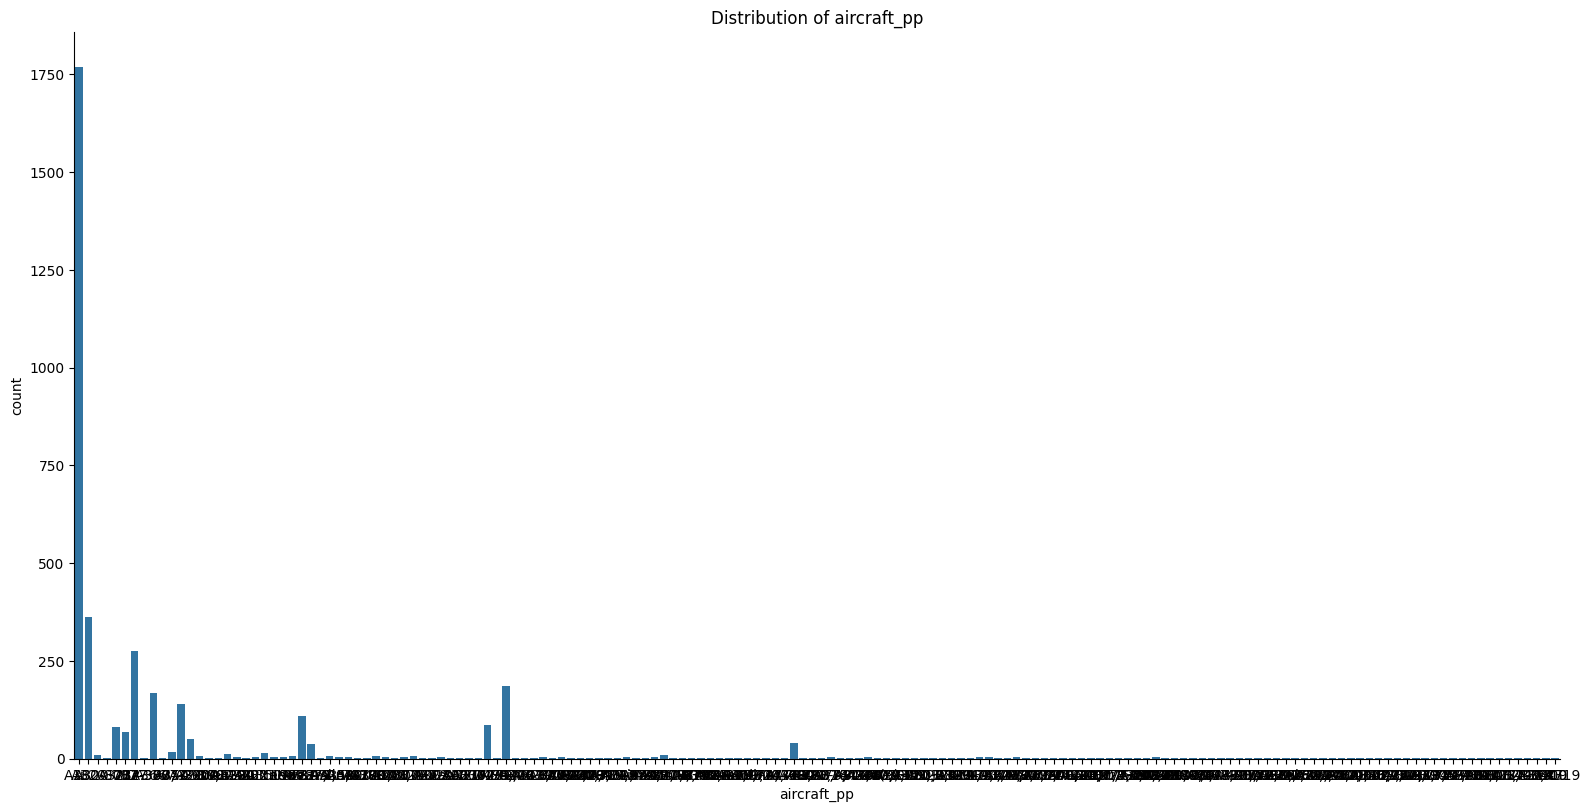

In [56]:
# handling aircraft
aircraft_companies = ["Boeing", "Airbus", "Embraer",'B0eing','ER','Various','\xc2\xa0','boeing','Boieng','Finnair']

# Create a new column "aircraft_pp" by removing manufacturers from the "aircraft" column
df_aq['aircraft_pp'] = df_aq['aircraft']
for company in aircraft_companies:
    df_aq['aircraft_pp'] = df_aq['aircraft_pp'].str.replace(company, '')


# Remove spaces, split by '/', merge splits with ',', and lowercase
count_nan = 0
count_valid = 0
# Assuming df_aq is your DataFrame
for index, row in df_aq.iterrows():
    aircraft_pp_value = str(row['aircraft_pp'])
    
    # Check your condition here, for example:
    if aircraft_pp_value == 'nan':
        # Modify the 'aircraft_pp' value
        df_aq.at[index, 'aircraft_pp'] = "u"
        count_nan = count_nan + 1
    else:
        if '&' in aircraft_pp_value:
            aircraft_pp_value = aircraft_pp_value.replace('&', ',')
        if 'and' in aircraft_pp_value:
            aircraft_pp_value = aircraft_pp_value.replace('and', ',')
        if '/' in aircraft_pp_value:
            aircraft_pp_value = aircraft_pp_value.replace('/', ',')
        aircraft_pp_value = aircraft_pp_value.replace(' ', '')

        if aircraft_pp_value!="":
            count_valid = count_valid + 1
            df_aq.at[index, 'aircraft_pp'] = aircraft_pp_value
        else:
            df_aq.at[index, 'aircraft_pp'] = "u"
            count_nan = count_nan + 1

       
    
print(f'Aircraft infos') 
print(f'counter NaN: {count_nan}') 
print(f'counter Valid: {count_valid}') 

stats_unique_values(df_aq, 'aircraft_pp')


In [57]:
# Ratings

# Columns to convert to numeric
columns_to_convert = [
    'ratingSeatComfort',
    'ratingCabinStaffService',
    'ratingFoodAndBeverages',
    'ratingInflightEntertainment',
    'ratingGroundService',
    'ratingWifiAndConnectivity',
    'ratingValueForMoney'
]

# Convert columns to numeric
df_aq[columns_to_convert] = df_aq[columns_to_convert].apply(pd.to_numeric, errors='coerce')



Statistics for ratingSeatComfort:
Mean: 2.8730693625386126
Standard Deviation: 1.3628938305022864
Column: ratingSeatComfort has 6 unique values in 3677 rows

3.0  842 (23.65%)
1.0  827 (23.22%)
4.0  812 (22.80%)
2.0  590 (16.57%)
5.0  490 (13.76%)


Name: ratingSeatComfort, dtype: float64



 ---------------------------------------------


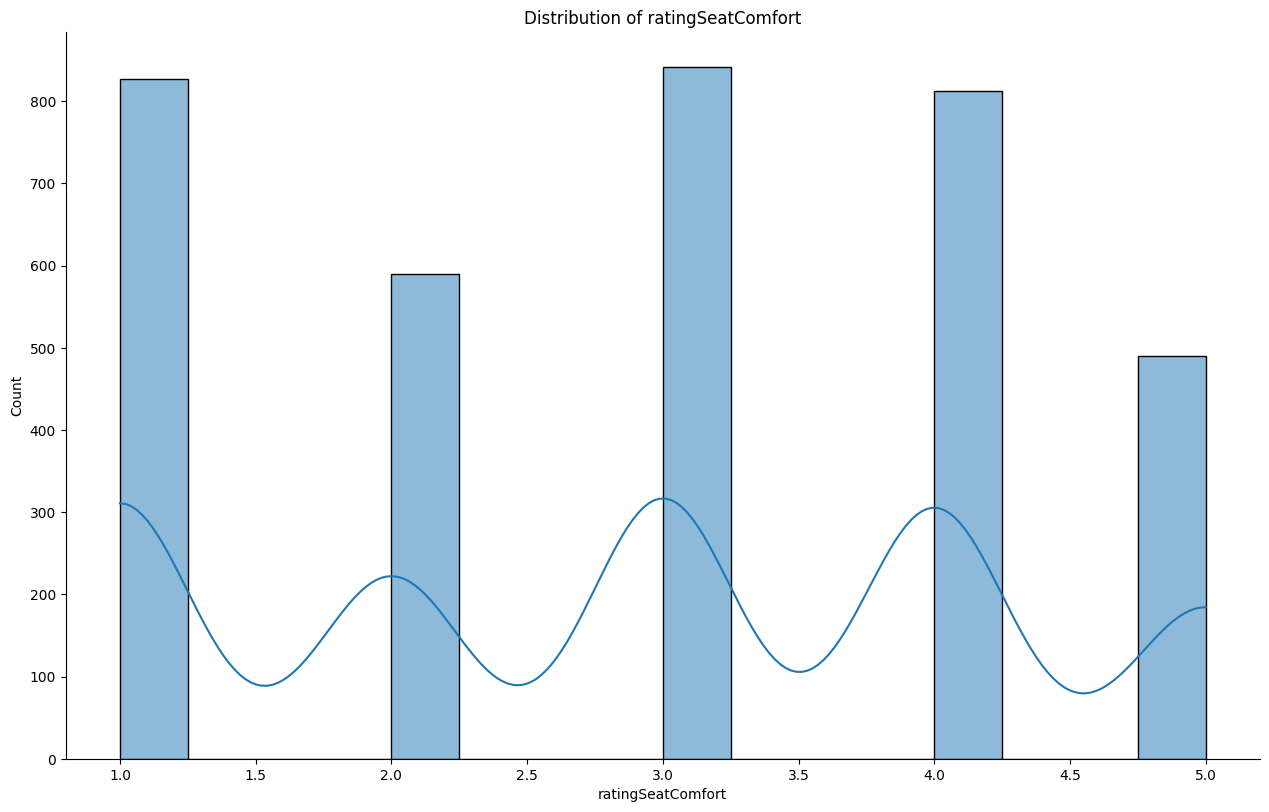

In [58]:
#ratingSeatComfort
column_stats = df_aq['ratingSeatComfort'].describe()

mean = column_stats['mean']
std = column_stats['std']

print(f"\nStatistics for {'ratingSeatComfort'}:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

stats_unique_values(df_aq, 'ratingSeatComfort')


Statistics for ratingCabinStaffService:
Mean: 3.2540845070422537
Standard Deviation: 1.4894023845589424
Column: ratingCabinStaffService has 6 unique values in 3677 rows

5.0  1033 (29.10%)
4.0  713 (20.08%)
1.0  690 (19.44%)
3.0  617 (17.38%)
2.0  497 (14.00%)


Name: ratingCabinStaffService, dtype: float64



 ---------------------------------------------


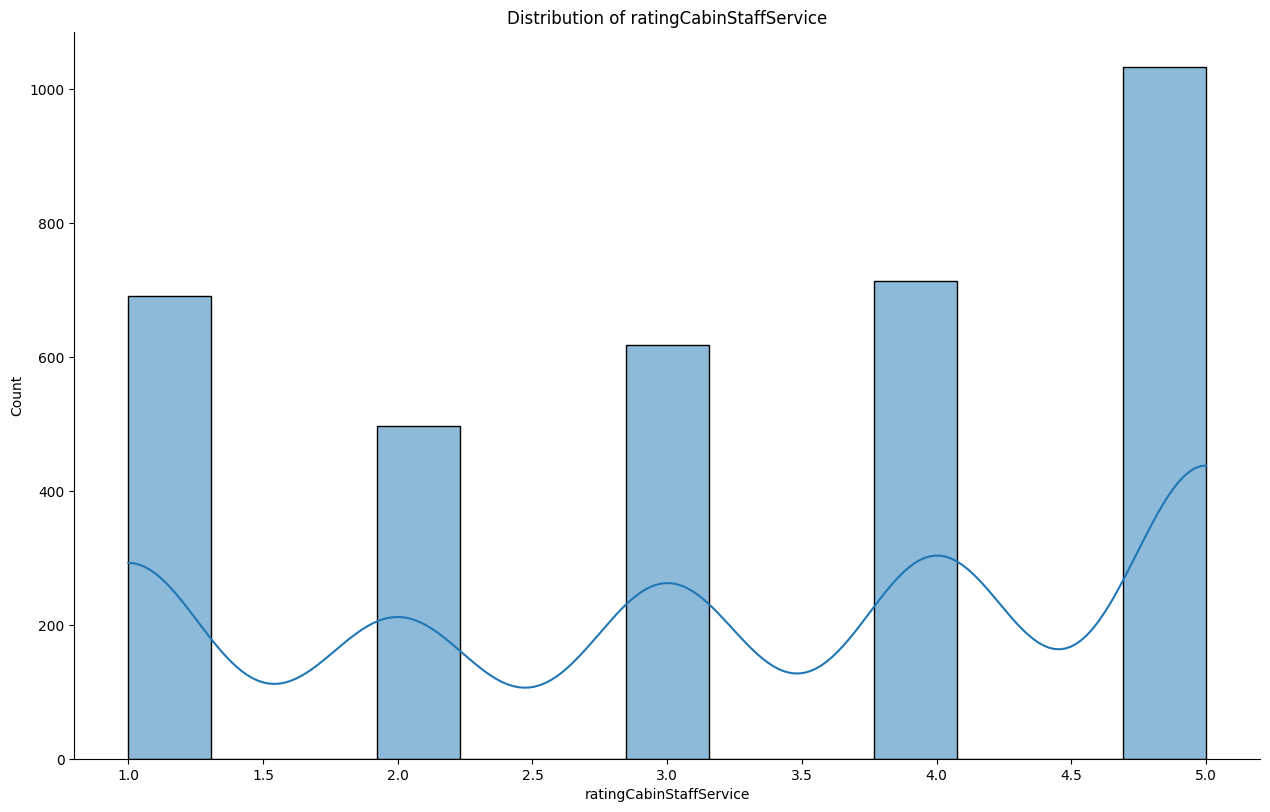

In [59]:
#ratingCabinStaffService
column_stats = df_aq['ratingCabinStaffService'].describe()

mean = column_stats['mean']
std = column_stats['std']

print(f"\nStatistics for {'ratingCabinStaffService'}:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

stats_unique_values(df_aq, 'ratingCabinStaffService')


Statistics for ratingFoodAndBeverages:
Mean: 2.7146326654523376
Standard Deviation: 1.4376139578300242
Column: ratingFoodAndBeverages has 6 unique values in 3677 rows

1.0  989 (30.02%)
4.0  653 (19.82%)
3.0  612 (18.58%)
2.0  565 (17.15%)
5.0  475 (14.42%)


Name: ratingFoodAndBeverages, dtype: float64



 ---------------------------------------------


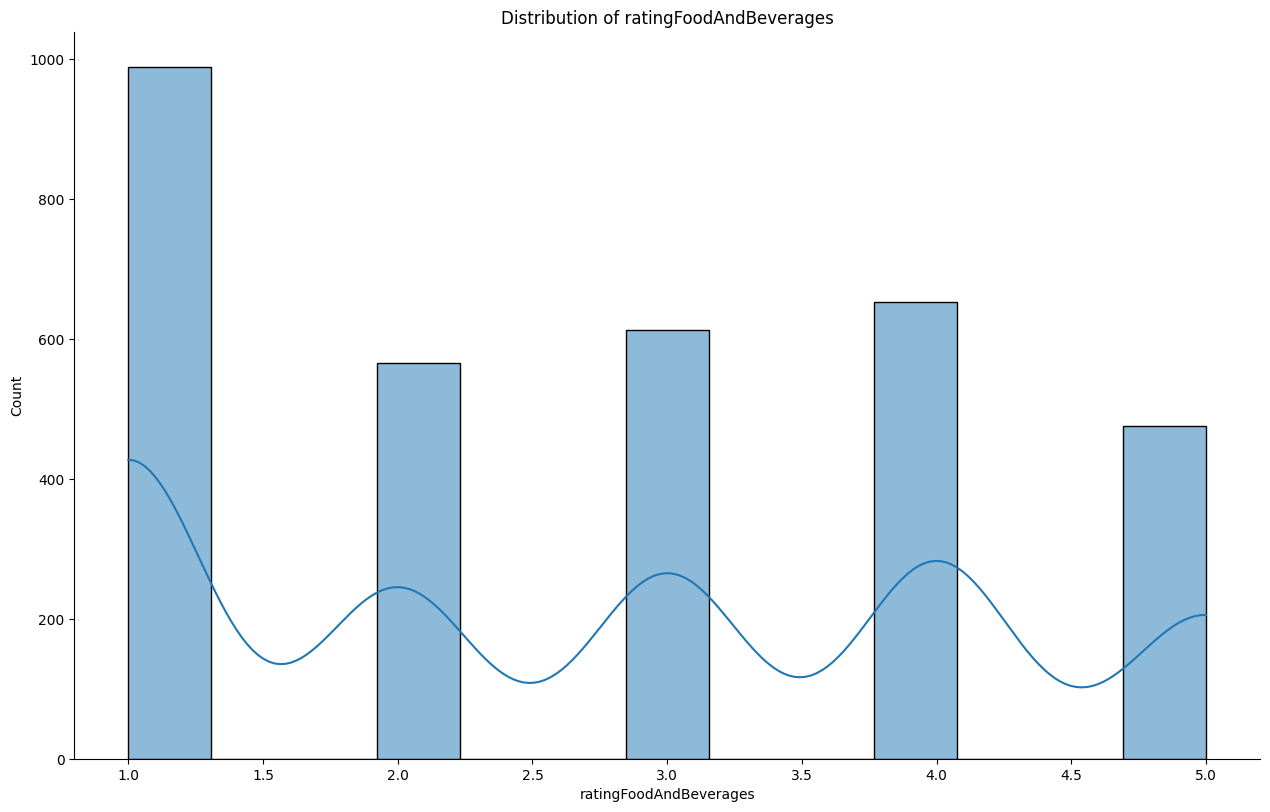

In [60]:
#ratingFoodAndBeverages
column_stats = df_aq['ratingFoodAndBeverages'].describe()

mean = column_stats['mean']
std = column_stats['std']

print(f"\nStatistics for {'ratingFoodAndBeverages'}:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

stats_unique_values(df_aq, 'ratingFoodAndBeverages')


Statistics for ratingInflightEntertainment:
Mean: 2.653906866614049
Standard Deviation: 1.3989839415452023
Column: ratingInflightEntertainment has 6 unique values in 3677 rows

1.0  775 (30.58%)
3.0  549 (21.67%)
4.0  466 (18.39%)
2.0  427 (16.85%)
5.0  317 (12.51%)


Name: ratingInflightEntertainment, dtype: float64



 ---------------------------------------------


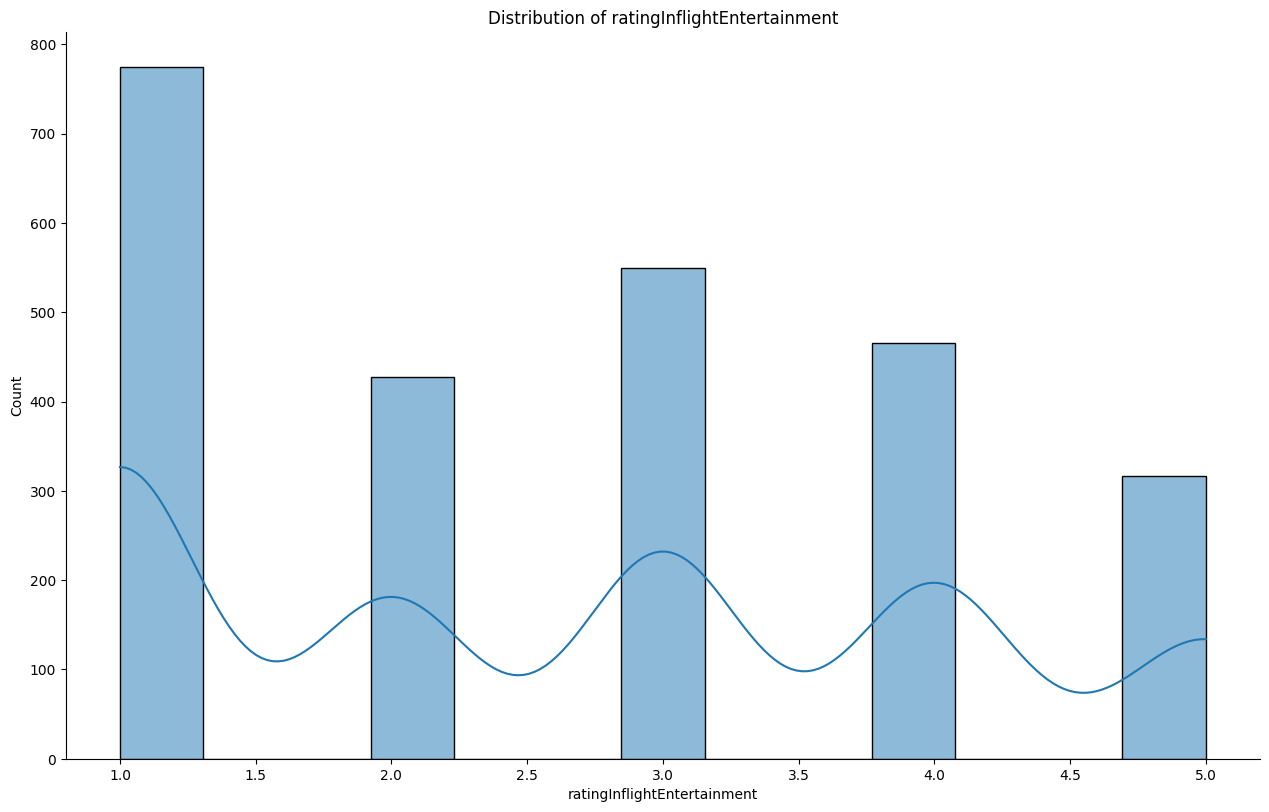

In [61]:
#ratingInflightEntertainment
column_stats = df_aq['ratingInflightEntertainment'].describe()

mean = column_stats['mean']
std = column_stats['std']

print(f"\nStatistics for {'ratingInflightEntertainment'}:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

stats_unique_values(df_aq, 'ratingInflightEntertainment')


Statistics for ratingGroundService:
Mean: 2.7848591549295776
Standard Deviation: 1.4568525986073637
Column: ratingGroundService has 6 unique values in 3677 rows

1.0  866 (30.49%)
4.0  629 (22.15%)
3.0  559 (19.68%)
5.0  426 (15.00%)
2.0  360 (12.68%)


Name: ratingGroundService, dtype: float64



 ---------------------------------------------


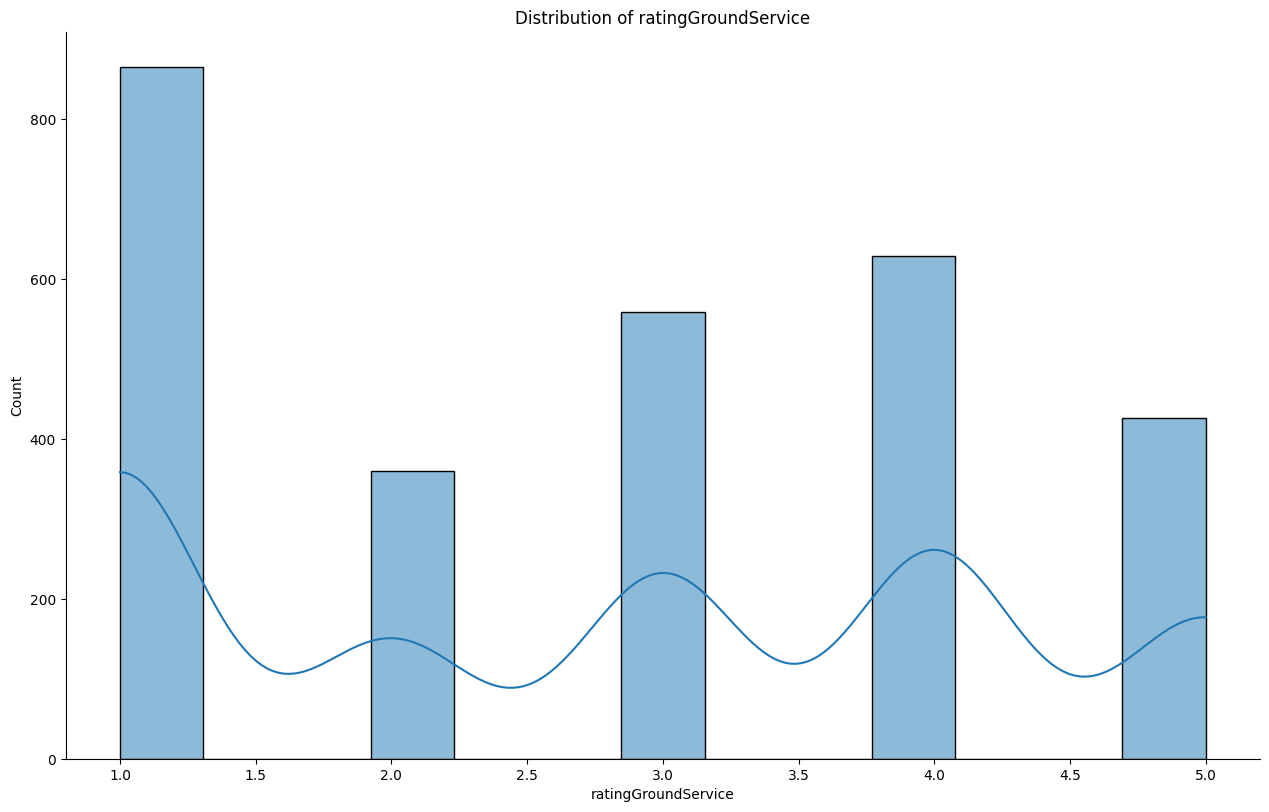

In [62]:
#ratingGroundService
column_stats = df_aq['ratingGroundService'].describe()

mean = column_stats['mean']
std = column_stats['std']

print(f"\nStatistics for {'ratingGroundService'}:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

stats_unique_values(df_aq, 'ratingGroundService')


Statistics for ratingWifiAndConnectivity:
Mean: 1.9253731343283582
Standard Deviation: 1.3564426010615824
Column: ratingWifiAndConnectivity has 6 unique values in 3677 rows

1.0  370 (61.36%)
3.0  71 (11.77%)
2.0  62 (10.28%)
5.0  54 (8.96%)
4.0  46 (7.63%)


Name: ratingWifiAndConnectivity, dtype: float64



 ---------------------------------------------


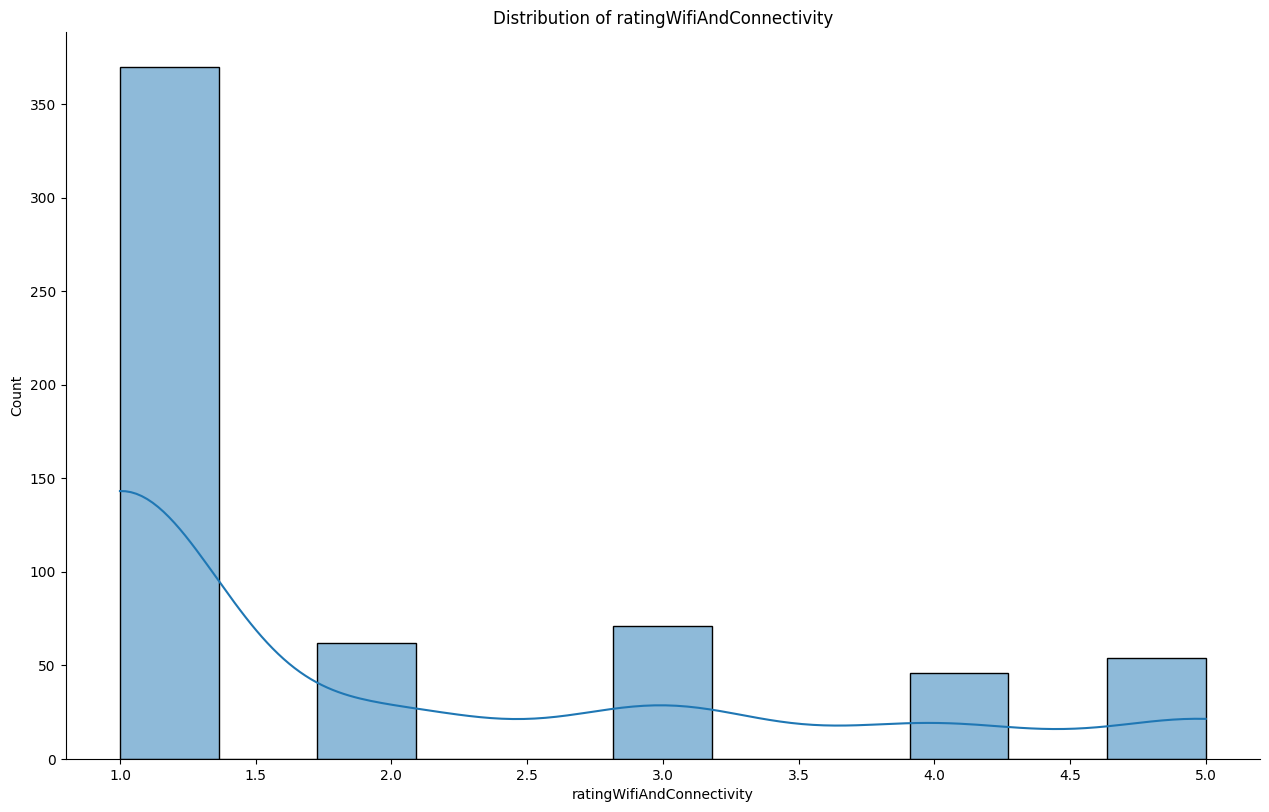

In [63]:
#ratingWifiAndConnectivity
column_stats = df_aq['ratingWifiAndConnectivity'].describe()

mean = column_stats['mean']
std = column_stats['std']

print(f"\nStatistics for {'ratingWifiAndConnectivity'}:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

stats_unique_values(df_aq, 'ratingWifiAndConnectivity')


Statistics for ratingValueForMoney:
Mean: 2.6879760609358
Standard Deviation: 1.4707218406238447
Column: ratingValueForMoney has 6 unique values in 3677 rows

1.0  1194 (32.48%)
4.0  673 (18.31%)
3.0  664 (18.06%)
2.0  574 (15.61%)
5.0  571 (15.53%)


Name: ratingValueForMoney, dtype: float64



 ---------------------------------------------


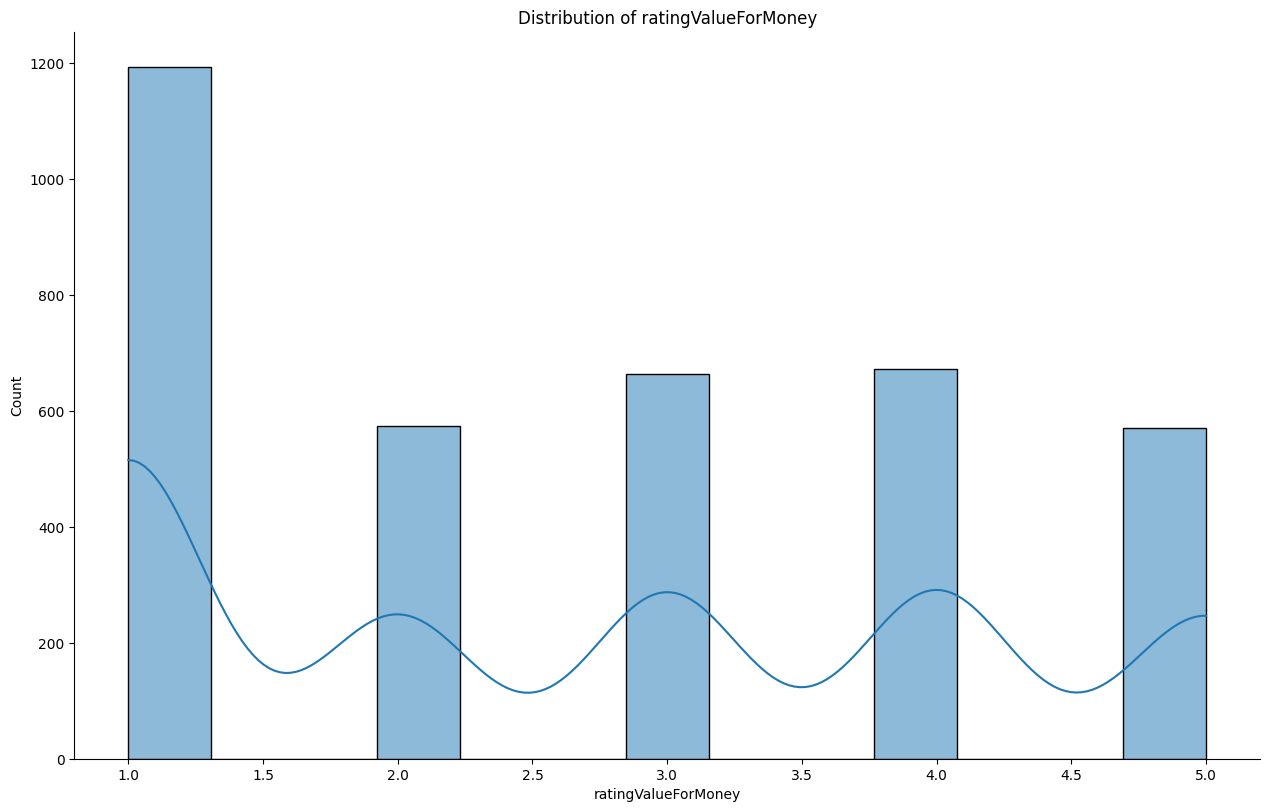

In [64]:
#ratingValueForMoney
column_stats = df_aq['ratingValueForMoney'].describe()

mean = column_stats['mean']
std = column_stats['std']

print(f"\nStatistics for {'ratingValueForMoney'}:")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

stats_unique_values(df_aq, 'ratingValueForMoney')

In [65]:
# Export dataframe
df_aq.to_csv('data/t1p1-dataframe_after_eda.csv', sep="}", index=False)

# LAST 3 YEARS  

In [67]:
df_aq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3677 entries, 0 to 3685
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3677 non-null   int64         
 1   rating                       3672 non-null   float64       
 2   authorNationality            3675 non-null   object        
 3   isTripVerified               3677 non-null   bool          
 4   title                        3677 non-null   object        
 5   datePublished                3677 non-null   datetime64[ns]
 6   body                         2163 non-null   object        
 7   travellerType                2915 non-null   object        
 8   aircraft                     1913 non-null   object        
 9   cabin                        3675 non-null   object        
 10  routeFrom                    2898 non-null   object        
 11  routeVia                     2911 non-null   obj

In [71]:
import pandas as pd
import numpy as np
from datetime import datetime


# Calculate the current year
current_year = datetime.now().year

# Calculate the date 3 years ago
three_years_ago = current_year - 3

# Filter the DataFrame to get reviews from the last 3 years
recent_reviews = df_aq[df_aq['datePublished'].dt.year >= three_years_ago]

# Calculate the average rating for the last 3 years
average_rating_last_3_years = np.mean(recent_reviews['rating'].astype(float))

# Calculate the average rating from the start
average_rating_from_start = np.mean(df_aq['rating'].astype(float))

print('REVIEW RATING')
print(average_rating_last_3_years)
print(average_rating_from_start)

REVIEW RATING
3.7667185069984446
4.732298474945534


In [75]:
# Define the unique traveler types
traveler_types = ['Couple Leisure', 'Solo Leisure', 'Business', 'Family Leisure']

# Create a dictionary to store the results
avg_ratings = {}

# Loop through each traveler type and calculate the average ratings
for traveler_type in traveler_types:
    # Filter the DataFrame for the current traveler type
    traveler_type_df = df_aq[df_aq['travellerType'] == traveler_type]
    
    # Calculate the average rating from the start
    avg_rating_from_start = np.mean(traveler_type_df['rating'].astype(float))
    
    # Filter the DataFrame for the last 3 years
    recent_reviews = traveler_type_df[traveler_type_df['datePublished'].dt.year >= three_years_ago]
    
    # Calculate the average rating for the last 3 years
    avg_rating_last_3_years = np.mean(recent_reviews['rating'].astype(float))
    
    # Store the results in the dictionary
    avg_ratings[traveler_type] = {
        'AvgRatingLast3Years': avg_rating_last_3_years,
        'AvgRatingFromStart': avg_rating_from_start
    }

print(avg_ratings)

{'Couple Leisure': {'AvgRatingLast3Years': 4.0, 'AvgRatingFromStart': 4.515640766902119}, 'Solo Leisure': {'AvgRatingLast3Years': 4.240384615384615, 'AvgRatingFromStart': 4.992117117117117}, 'Business': {'AvgRatingLast3Years': 2.965217391304348, 'AvgRatingFromStart': 3.507042253521127}, 'Family Leisure': {'AvgRatingLast3Years': 3.25, 'AvgRatingFromStart': 4.337531486146096}}


In [77]:
# Define the unique traveler types
traveler_types = ['Economy Class', 'Business Class', 'Premium Economy', 'First Class']

# Create a dictionary to store the results
avg_ratings = {}

# Loop through each traveler type and calculate the average ratings
for traveler_type in traveler_types:
    # Filter the DataFrame for the current traveler type
    traveler_type_df = df_aq[df_aq['cabin'] == traveler_type]
    
    # Calculate the average rating from the start
    avg_rating_from_start = np.mean(traveler_type_df['rating'].astype(float))
    
    # Filter the DataFrame for the last 3 years
    recent_reviews = traveler_type_df[traveler_type_df['datePublished'].dt.year >= three_years_ago]
    
    # Calculate the average rating for the last 3 years
    avg_rating_last_3_years = np.mean(recent_reviews['rating'].astype(float))
    
    # Store the results in the dictionary
    avg_ratings[traveler_type] = {
        'AvgRatingLast3Years': avg_rating_last_3_years,
        'AvgRatingFromStart': avg_rating_from_start
    }

print(avg_ratings)

{'Economy Class': {'AvgRatingLast3Years': 3.152112676056338, 'AvgRatingFromStart': 4.331413612565445}, 'Business Class': {'AvgRatingLast3Years': 4.558035714285714, 'AvgRatingFromStart': 5.108585858585859}, 'Premium Economy': {'AvgRatingLast3Years': 4.169811320754717, 'AvgRatingFromStart': 4.866666666666666}, 'First Class': {'AvgRatingLast3Years': 5.545454545454546, 'AvgRatingFromStart': 6.028301886792453}}


You can find a textual explanation of all the data I've extracted during the Exploratory Data Analysis (EDA) at the following URL: actum.it/notebook.